# Business Problem Solving

- Business Understanding
- Develop Hypothesis
- Data Collection
- Problem Mapping
- Solution Approach
- EDA
- Model Building
- Model Evaluation

# Assignment Requirements

### Utilise the concepts that you learnt in Business Problem Solving module to develop a solution for the given problem statement. Make sure you include the following points
- Go through the links provided and the dataset given to developing 4-5 hypotheses regarding the possible root causes of  low lead conversion
- Map the problem to the relevant data science problem and develop the solution approach that you’ll follow.
- Proceed with EDA to find the most relevant variables that affect lead conversion.
- Discuss at least 3 ML models that can be utilised to solve this problem. Note that you don’t have to build the model for the dataset, just a brief description of the models that would work in this scenario along with the reasons on when one can be preferred over the other.
- Mention the evaluation metrics that you’ll be using to track your model’s performance. Make sure that they’re mapped to the relevant business outcomes.

# 1. Business Understanding

`TechnoServe` is a cloud based software service provider which provides servces to small and medium enterprises. Company's revenue is largely dependent on cloud services that it provides. The Company is facing the problem of declining conversions across it's sales. The company's conversion percentage has dropped from 35% at the end of the last fiscal (FY 2019-20) to 25% at present. The company wants to `increase the conversion percentage`.

# 2. Developing Hypothesis

Here we can use `Opportunity Status` as the `Target Variable`.
1. `Sales Velocity` can be root cause of the decline in conversion percentage.
2. `Sales Stage Iterations` can be root cause of the decline in conversion percentage.
3. `Client Employees Sizing` can be root cause of the decline in conversion percentage.
4. `Compete Intel` can be root cause of the decline in conversion percentage.
5. `Technology Primary` can be root cause of the decline in conversion percentage.
6. `All of the above` together can be root cause of the decline in conversion percentage.

# 3. Data Collection

- The relevant data has been given to us which we can use to perform our analysis and if necessary model building

# 4. Problem Mapping

- Problem Mapping would be to consider `Opportunity Status` as the `Target Variable` and consider it to be a `classification problem` i.e. given certain data we can predict whether a lead would be converted or lost. However, even though using different models will be to predict it would be exciting and we will do that eventually, here my analysis is that performing EDA and selecting variables which are affecting the Opportunity Status would be apt rather than building a model.

# 5. Solution Approach

- We will Use EDA to analyse important variables and their effects on 'Opportunity Status'.
- We will next build different Models to see whether the variables can help in predicting the 'Opportunity Status' which are as foolows.
    - Logistic Regression
    - Decision Tree Classifier
    - Random Forest Classifier
    - Support Vector Machines
    - Clustering
    - XGBoost
    - Artificial Neural Network (ANN)
- We can also use other model building techniques like Naive Bayes, Random Forest etc.
- We can perform periodical checks like EDA, model building like every month or on quarterly basis to check the progress

# 6. Exploratory Data Analysis(EDA)

## Importing relevant libraries and adjusting display settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# To display all results of a single cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Setting display options

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')

## Importing the data

In [4]:
techno = pd.read_excel('Sales_Dataset.xlsx')

In [5]:
techno.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


## Checking structure of data

In [6]:
# Checking shape of the data

techno.shape

(78025, 13)

In [7]:
# Looking at info of columns

techno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology
Primary              78025 non-null  object
 2   City                            78025 non-null  object
 3   B2B Sales Medium                78025 non-null  object
 4   Sales Velocity                  78025 non-null  int64 
 5   Opportunity Status              78025 non-null  object
 6   Sales Stage Iterations          78025 non-null  int64 
 7   Opportunity Size (USD)          78025 non-null  int64 
 8   Client Revenue Sizing           78025 non-null  object
 9   Client Employee Sizing          78025 non-null  object
 10  Business from Client Last Year  78025 non-null  object
 11  Compete Intel                   78025 non-null  object
 12  Opportunity Sizing              78025 non-null

In [8]:
# Checking for outliers, central tendency and variance of numerical columns in the data

techno.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.99])

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
count,78025.000000,78025.000000,78025.000000
mean,43.595348,2.955732,30085.664992
std,26.585600,1.497242,21169.932617
min,0.000000,1.000000,0.000000
25%,19.000000,2.000000,13816.000000
50%,43.000000,3.000000,29845.000000
75%,65.000000,3.000000,43185.000000
95%,88.000000,6.000000,56424.800000
99%,91.000000,8.000000,118818.120000
max,210.000000,23.000000,149981.000000


- ***Observations:***
- We can see that mean and median of all the 3 variables on which describe function was used are similar
- For variables 'Sales Velocity' and 'Sales Stage Iterations' there is large difference between 99% and Max, need to check that.

In [9]:
# Checking the data point which has that huge difference between 99% and Max for 'Sales Velocity' and 'Sales Stage Iterations'

techno.loc[(techno['Sales Velocity'] == 210) | (techno['Sales Stage Iterations'] == 23), :]

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
4004,N00004005,Technical Business Solutions,Mumbai,Enterprise Sellers,47,Loss,23,29903,100K or less,5K to 15K,0 (No business),Unknown,20K to 30K
45714,N00045715,Analytics,Pune,Marketing,210,Won,5,59244,100K or less,1K or less,0 (No business),None,50K to 60K
45715,N00045716,Analytics,Pune,Marketing,210,Won,5,54407,100K or less,1K or less,0 (No business),None,50K to 60K


- ***Observations:***
- Even though 'Sales Velocity' was 210 for 'Opportunity ID == [N00045715, N00045716]' the 'Opportunity Status' was 'Won' for both of them which is a good sign, it was worth the effort.
- Even though 'Sales Stage Iterations' for 'Opportunity ID == N00004005' was 23 which means that 23 times status of opportunity was changed which is huge, and not worth the effort.
- It may also be that if 'Sales Stage Iterations' was more than 8, it may result in opportunity status of 'Loss'

In [10]:
# Checking for duplicates

techno.duplicated().sum()

0

In [11]:
# Checking for missing values

techno.isnull().sum()

Opportunity ID                    0
Technology\nPrimary               0
City                              0
B2B Sales Medium                  0
Sales Velocity                    0
Opportunity Status                0
Sales Stage Iterations            0
Opportunity Size (USD)            0
Client Revenue Sizing             0
Client Employee Sizing            0
Business from Client Last Year    0
Compete Intel                     0
Opportunity Sizing                0
dtype: int64

In [12]:
# Checking categories in each variable

techno.nunique().sort_values()

Opportunity Status                    2
Compete Intel                         3
Technology\nPrimary                   4
B2B Sales Medium                      5
Client Revenue Sizing                 5
Client Employee Sizing                5
Business from Client Last Year        5
City                                  7
Opportunity Sizing                    7
Sales Stage Iterations               22
Sales Velocity                      138
Opportunity Size (USD)            35275
Opportunity ID                    78025
dtype: int64

## Performing EDA

- **Checking for imbalance and Outliers in the data**

In [13]:
# Checking for imbalance in the 'Opportunity Status' variable in percentage

round(techno['Opportunity Status'].value_counts(normalize=True) * 100, 2)

Loss    77.41
Won     22.59
Name: Opportunity Status, dtype: float64

- ***Observations:***
- We can see that there is imbalance in the dataset, we need to keep this in mind while using performance metrics like accuracy, recall etc.
- We can also see that 'Loss' is more than 3 times that of 'Won'

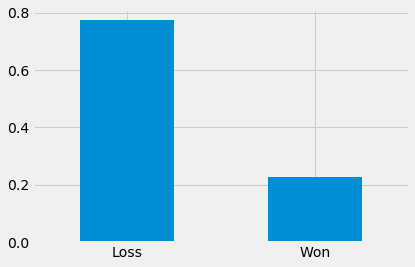

In [14]:
techno['Opportunity Status'].value_counts(normalize=True).plot(kind='bar', rot=False)
plt.show();

- ***Observations***
- We can see that there is imbalance in the dataset, we need to keep this in mind while using performance metrics like accuracy, recall etc.
- We can also see that 'Loss' is more than 3 times that of 'Won'

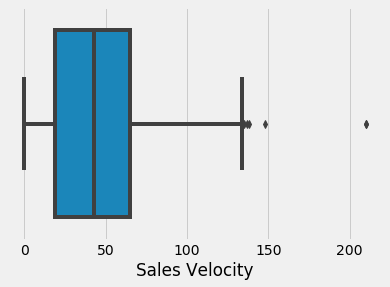

In [15]:
sb.boxplot(data=techno, x='Sales Velocity')
plt.show();

- ***Observations:***
- We can see few outliers and one outlier at the extreme, which we also saw earlier while checking difference between 99% and Max
- Also the boxplot is a bit right skewed
- It seems 50% of the points are between sales velocity of 20 days and 60 days

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


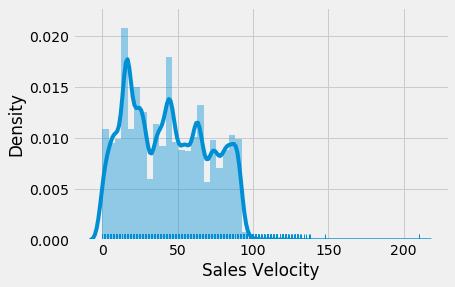

In [16]:
sb.distplot(techno['Sales Velocity'], rug=True)
plt.show();

- ***Observations:***
- Displot gives us clearer picture, largely the points are concentrated between 0 and 100 days
- Density of points was more around 20 days

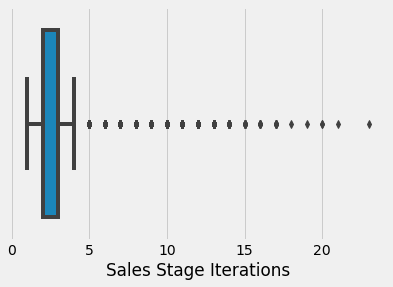

In [17]:
sb.boxplot(data=techno, x='Sales Stage Iterations')
plt.show();

- ***Observations:***
- There are lot of outliers in this variable with the extreme outlier being at 23, which we also saw earlier while checking difference between 99% and Max
- 50% of points are between 1.25 times and 3.75 times

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


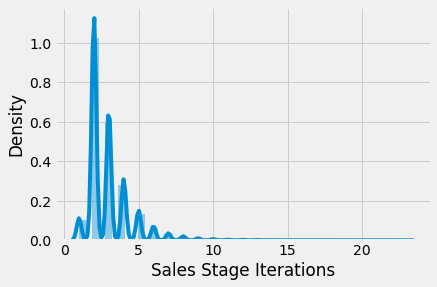

In [18]:
sb.distplot(techno['Sales Stage Iterations'])
plt.show();

- ***Observations:***
- Distplot shows very high skewness in this variable, however density of points is more around 1.25 times
- This displot is right skewed

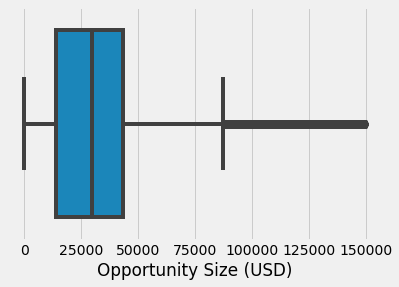

In [19]:
sb.boxplot(data=techno, x='Opportunity Size (USD)')
plt.show();

- ***Observations:***
- There are outliers in this variable, however they are very close to each other
- 50% of the points lie between 15000 and 45000 USD
- This boxplot is right skewed

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


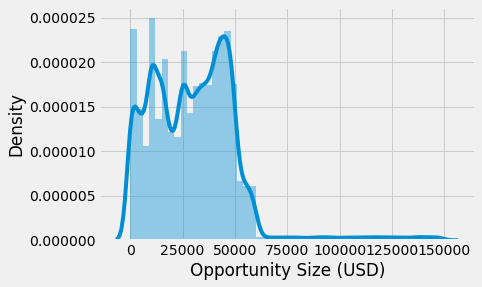

In [20]:
sb.distplot(techno['Opportunity Size (USD)'])
plt.show();

- ***Observations:***
- Displot gives us clearer picture, largely the points are concentrated between 0 and 60000 USD
- Density of points was more around 45000 USD

- **Performing the Analysis**

- **Univariate analysis for numerical variables with respect to 'Opportunity Status'**

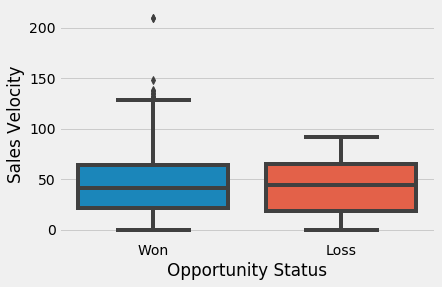

In [21]:
sb.boxplot(data=techno, x='Opportunity Status', y='Sales Velocity')
plt.show();

- ***Observations:***
- Interval of number of days taken for sales process was a bit more for 'Opportunity Status' of "Loss"
- There is not much difference between 'Won' and 'Loss' for median values
- There are outliers in 'Opportunity Status' == 'Won'
- Distribution of points is more for 'Opportunity Status' == 'Won' i.e. datapoints are widely distributed

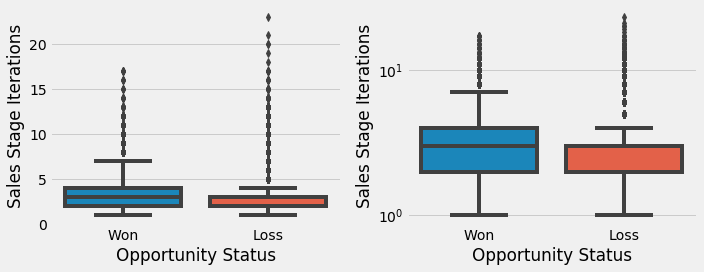

In [22]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sb.boxplot(data=techno, x='Opportunity Status', y='Sales Stage Iterations')

plt.subplot(122)
sb.boxplot(data=techno, x='Opportunity Status', y='Sales Stage Iterations')
plt.yscale('log')
plt.tight_layout()
plt.show();

- ***Observations***
- Interval of number of times status was changed for sales stage iterations was a bit more for 'Opportunity Status' of "Won"
- There is difference between 'Won' and 'Loss' for median values and it is more for 'Won'
- There are outliers in 'Opportunity Status' == 'Won' and 'Opportunity Status' == 'Loss' but more in 'Opportunity Status' == 'Loss', it means more number of times status change may indicate opportunity status of 'Loss'
- Distribution of points is more for 'Opportunity Status' == 'Won' i.e. datapoints are widely distributed

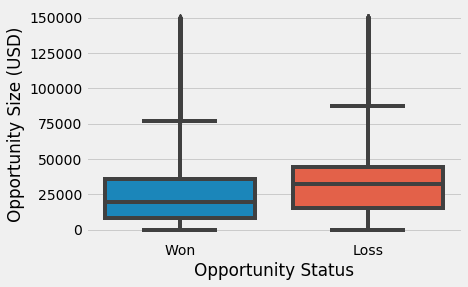

In [23]:
sb.boxplot(data=techno, x='Opportunity Status', y='Opportunity Size (USD)')
plt.show();

- ***Observations:***
- There are outliers in 'Opportunity Status' == 'Won' and 'Opportunity Status' == 'Loss' but more in 'Opportunity Status' == 'Won'
- There is difference between 'Won' and 'Loss' for median values and it is more for 'Loss'
- Distribution of points is more for 'Opportunity Status' == 'Won' i.e. datapoints are comparatively widely distributed
- Plot shows opprotunity size was more for 'Opportunity Status' == 'Loss, so need to convert them to 'Won'

 
   - **Univariate analysis for categorical variables with respect to 'Opportunity Status'**

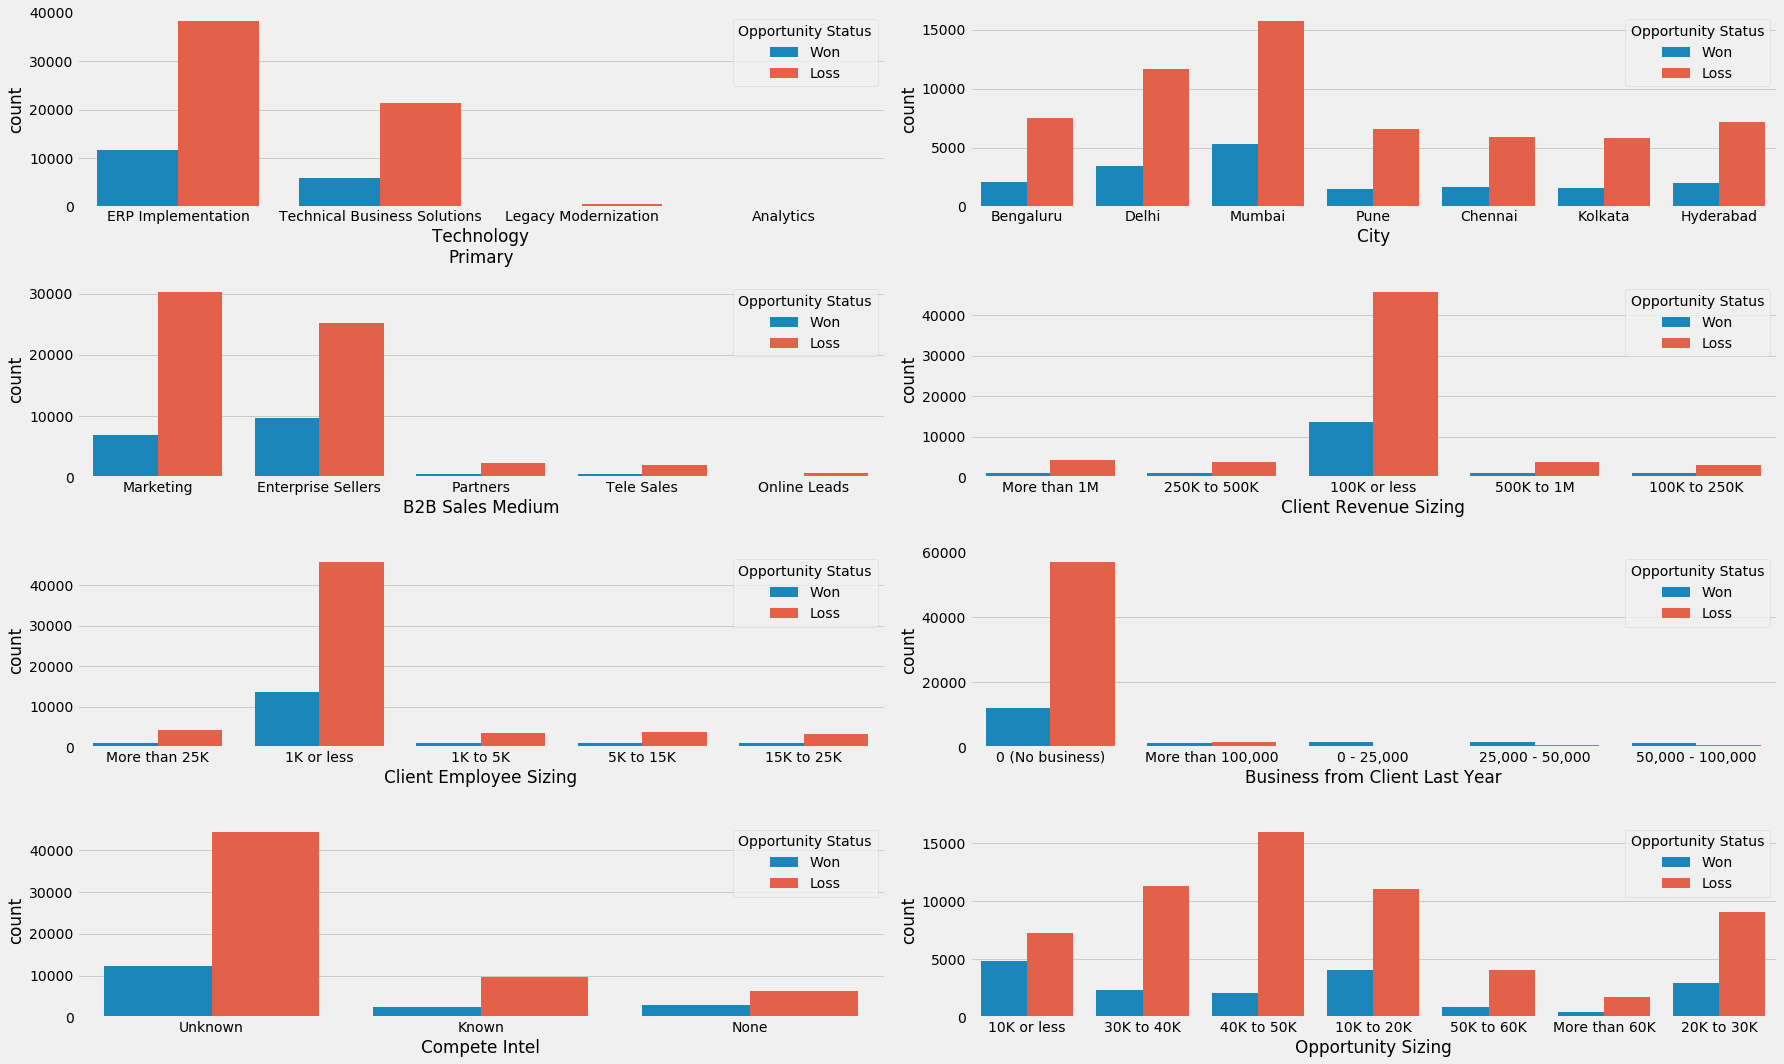

In [24]:
plt.figure(figsize=(25,15))

features = techno.drop(['Opportunity ID', 'Sales Velocity', 'Sales Stage Iterations', 'Opportunity Size (USD)', 
                        'Opportunity Status'], axis=1).columns

for i in enumerate(features):
    plt.subplot(4,2,i[0]+1)
    sb.countplot(x=i[1],hue='Opportunity Status',data=techno)

plt.tight_layout()
plt.show();

- ***Observations:***
- **For 'Technology/Primary':**
    - Counts for 'Win' status was highest for ERP Implementation and second highest was for Technical Business Solutions
    - Counts for 'Loss' status was highest for ERP Implementation and second highest was for Technical Business Solutions
    - Number of counts for 'Loss' status was more than number of counts for 'Win' status across all the sub categories, highest being for ERP Implementation and second highest was for Technical Business Solutions
    - Proportion of 'Win' to 'Loss' is low across all Technologies
- **For 'City':**
    - Counts for 'Win' status was highest for Mumbai and second highest was for Delhi
    - Counts for 'Loss' status was highest for Mumbai and second highest was for Delhi
    - Number of counts for 'Loss' status was more than number of counts for 'Win' status across all the sub categories, highest being for Mumbai and second highest was for Delhi
    - Proportion of 'Win' to 'Loss' is low across all cities
- **For 'B2B Sales Medium':**
    - Counts for 'Win' status was highest for Marketing and second highest was for Enterprise Sellers
    - Counts for 'Loss' status was highest for Marketing and second highest was for Enterprise Sellers
    - Number of counts for 'Loss' status was more than number of counts for 'Win' status across all the sub categories, highest being for Marketing and second highest was for Enterprise Sellers
    - Proportion of 'Win' to 'Loss' is low across all B2B Sales Medium
- **For 'Client Revenue Sizing':**
    - Counts for 'Win' status was highest for 100K or Less
    - Counts for 'Loss' status was highest for 100K or Less
    - Number of counts for 'Loss' status was more than number of counts for 'Win' status across all the sub categories, highest being for 100K or Less
    - Proportion of 'Win' to 'Loss' is low across all Client Revenue Sizing
- **For 'Client Employee Sizing':**
    - Counts for 'Win' status was highest for 1K or Less
    - Counts for 'Loss' status was highest for 1K or Less
    - Number of counts for 'Loss' status was more than number of counts for 'Win' status across all the sub categories, highest being for 1K or Less
    - Proportion of 'Win' to 'Loss' is low across all Client Employee Sizing
- **For 'Business from Client Last Year':**
    - '0(No Business)' may mean that the amount of business done last year was zero but were converted this year
    - Maybe '0(No Business)' means the information is not available
    - Number of counts for 'Loss' status was more than number of counts for 'Win' status across all the sub categories, highest being for 0(No Business)
    - Proportion of 'Win' to 'Loss' is low across all Business from Client Last Year
- **For 'Compete Intel':**
    - Counts for 'Win' status was highest for Unknown
    - Counts for 'Loss' status was highest for Unknown
    - Number of counts for 'Loss' status was more than number of counts for 'Win' status across all the sub categories, highest being for Unknown
    - Proportion of 'Win' to 'Loss' is low across all Compete Intel
    - It is adviseable to collect intel on competitors wherever possible
- **For 'Opportunity Sizing':**
    - Counts for 'Win' status was highest for 10K or Less and second highest was for 10K to 20K
    - Counts for 'Loss' status was highest for 40K to 50K and second highest was for 10K to 20K and 30K to 40K equally
    - Number of counts for 'Loss' status was more than number of counts for 'Win' status across all the sub categories, highest being for 40K to 50K and second highest was for 10K to 20K and 30K to 40K equally
    - Proportion of 'Win' to 'Loss' is low across all Opportunity Sizing
    - Need to put in lot of efforts in Opportunity Sizing of 40K to 50K and 10K to 20K and 30K to 40K equally

- **Bivariate analysis for numerical variables with respect to 'Opportunity Status'**

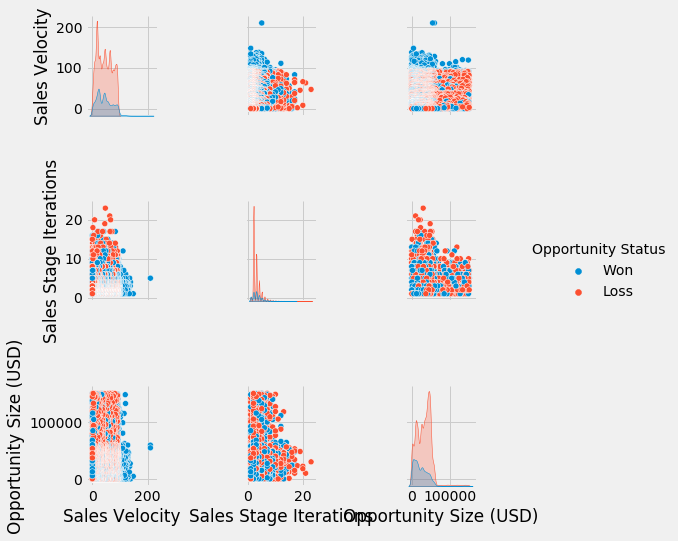

In [25]:
sb.pairplot(data= techno, vars= ['Sales Velocity', 'Sales Stage Iterations', 'Opportunity Size (USD)'], hue = 'Opportunity Status')
plt.show();

- ***Observations:***
- There is no correlation among the variables as such
- For 'Sales Velocity' vs 'Sales Stage Iterations', data points with opportunity status 'Won' are more between 0 and 10 times for 'Sales Stage Iterations', large number of data points with status 'Won' have 'Sales Velocity' of more than 100 days
- For 'Sales Velocity' vs 'Opportunity Size (USD)', data points with opportunity status 'Won' are more between 0 and 50000 USD for 'Opportunity Size (USD)', large number of data points with status 'Won' have 'Sales Velocity' of more than 100 days
- For 'Sales Stage Iterations' vs 'Opportunity Size (USD)', data points with opportunity status 'Won' are scattered ranging between 0 to 150000 USD for opportunity size and ranging between 7 to 17 times for stage iterations

In [26]:
techno.corr()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
Sales Velocity,1.000000,-0.025329,-0.009879
Sales Stage Iterations,-0.025329,1.000000,0.064593
Opportunity Size (USD),-0.009879,0.064593,1.000000


- **Bivariate analysis for categorical variables with respect to 'Opportunity Status'**

In [27]:
techno_won = techno.loc[techno['Opportunity Status'] == 'Won', :].copy()
techno_loss = techno.loc[techno['Opportunity Status'] == 'Loss', :].copy()

In [28]:
techno_won.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
6,N00000007,ERP Implementation,Delhi,Marketing,111,Won,12,12208,500K to 1M,More than 25K,0 (No business),Unknown,10K to 20K
15,N00000016,ERP Implementation,Bengaluru,Marketing,79,Won,5,0,More than 1M,1K or less,0 (No business),Known,10K or less
24,N00000025,Technical Business Solutions,Bengaluru,Enterprise Sellers,73,Won,9,23706,100K or less,1K or less,"0 - 25,000",Unknown,20K to 30K


In [29]:
techno_loss.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K
5,N00000006,Technical Business Solutions,Delhi,Enterprise Sellers,89,Loss,3,42501,More than 1M,1K or less,0 (No business),Unknown,40K to 50K
7,N00000008,ERP Implementation,Delhi,Marketing,82,Loss,6,54776,100K or less,1K or less,0 (No business),Known,50K to 60K


In [30]:
techno_won.shape, techno_loss.shape

((17627, 13), (60398, 13))

In [31]:
techno.columns

Index(['Opportunity ID', 'Technology\nPrimary', 'City', 'B2B Sales Medium',
       'Sales Velocity', 'Opportunity Status', 'Sales Stage Iterations',
       'Opportunity Size (USD)', 'Client Revenue Sizing',
       'Client Employee Sizing', 'Business from Client Last Year',
       'Compete Intel', 'Opportunity Sizing'],
      dtype='object')

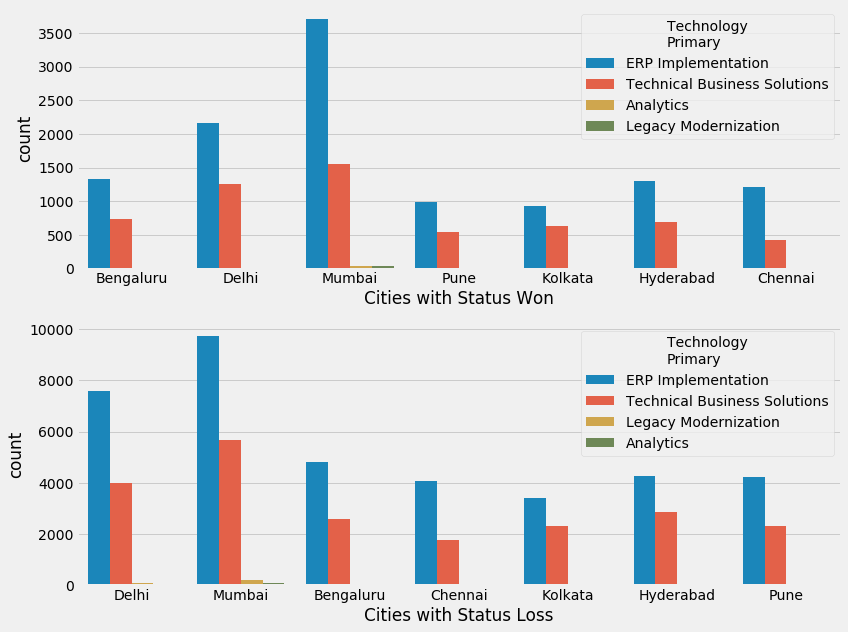

In [32]:
plt.figure(figsize=(12,9))

plt.subplot(211)
sb.countplot(x='City',hue='Technology\nPrimary',data=techno_won)
plt.xlabel('Cities with Status Won')

plt.subplot(212)
sb.countplot(x='City',hue='Technology\nPrimary',data=techno_loss)
plt.xlabel('Cities with Status Loss')

plt.tight_layout()
plt.show();

- ***Observations:***
- Of all the cities where status is 'Won' or status is 'Loss', the technology which was used the most is 'ERP Implementation', and among those cities, 'Mumbai' has highest ERP Implementation counts and Kolkata being the lowest
- The second most used technology was 'Technical Business Solutions' and it was highest in city 'Mumbai' for both status 'Won' and 'Loss'
- City 'Delhi' was second most to use technologies 'ERP Implementation' and 'Technical Business Solutions' for both status 'Won' and 'Loss'
- Presence of the organization related to technologies 'Legacy Modernization' and 'Analytics' is negligible, maybe the organization needs to concentrate more in these technologies as well

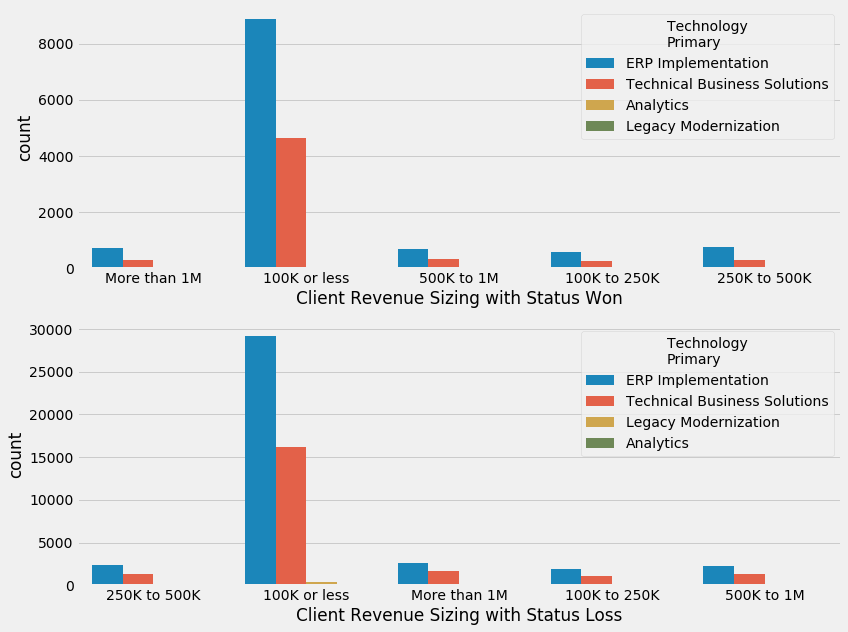

In [33]:
plt.figure(figsize=(12,9))

plt.subplot(211)
sb.countplot(x='Client Revenue Sizing',hue='Technology\nPrimary',data=techno_won)
plt.xlabel('Client Revenue Sizing with Status Won')

plt.subplot(212)
sb.countplot(x='Client Revenue Sizing',hue='Technology\nPrimary',data=techno_loss)
plt.xlabel('Client Revenue Sizing with Status Loss')

plt.tight_layout()
plt.show();

- ***Observations:***
- The number of counts for technology 'ERP Implementation' with 'Client Revenue Sizing' of 100K or less for status 'Won' was more than 8000 and it was the most among all the 'Client Revenue Sizing'
- The number of counts for technology 'ERP Implementation' with 'Client Revenue Sizing' of 100K or less for status 'Loss' was around 30000 and it was the most among all the 'Client Revenue Sizing'
- The number of counts for technology 'Technical Business Solutions' with 'Client Revenue Sizing' of 100K or less for status 'Won' was more than 8000 and it was the most among all the 'Client Revenue Sizing'
- The number of counts for technology 'Technical Business Solutions' with 'Client Revenue Sizing' of 100K or less for status 'Loss' was around 30000 and it was the most among all the 'Client Revenue Sizing'
- 'Client Revenue Sizing' from other two technologies is negligible

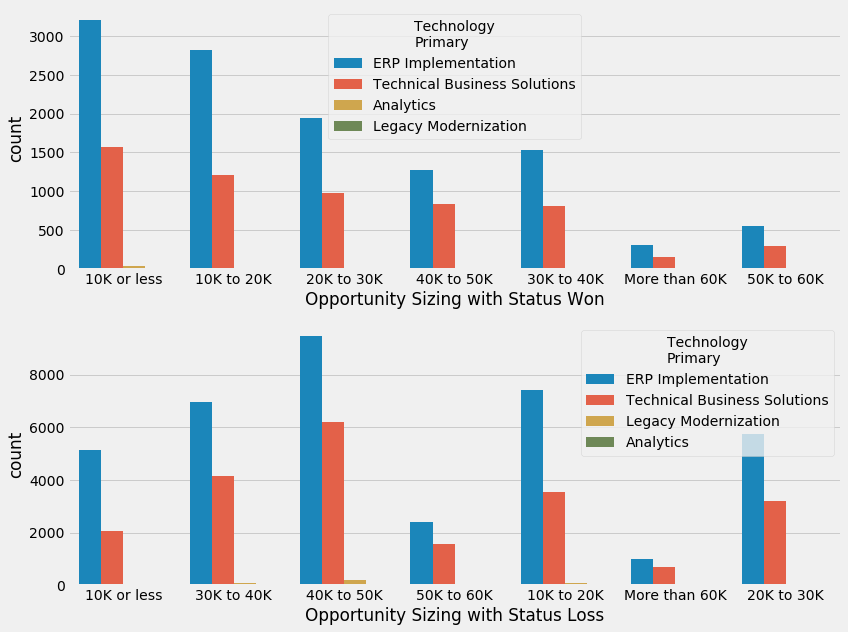

In [34]:
plt.figure(figsize=(12,9))

plt.subplot(211)
sb.countplot(x='Opportunity Sizing',hue='Technology\nPrimary',data=techno_won)
plt.xlabel('Opportunity Sizing with Status Won')

plt.subplot(212)
sb.countplot(x='Opportunity Sizing',hue='Technology\nPrimary',data=techno_loss)
plt.xlabel('Opportunity Sizing with Status Loss')

plt.tight_layout()
plt.show();

- ***Observations:***
- Scope of 'Opportunity Sizing' is more for technologies 'ERP Implementation' and 'Technical Business Solutions' when compared to 'Legacy Modernization' and 'Analytics'
- The number of counts for technology 'ERP Implementation' with 'Opportunity Sizing' of 10K or less for status 'Won' was more than 3000 and it was the most among all the 'Opportunity Sizing', and it was least for 'Opportunity Sizing' of more than 60K
- The number of counts for technology 'ERP Implementation' with 'Opportunity Sizing' of 40K to 50K for status 'Loss' was more than 8000 and it was the most among all the 'Opportunity Sizing', and it was least for 'Opportunity Sizing' of more than 60K
- The number of counts for technology 'Technical Business Solutions' with 'Opportunity Sizing' of 10K or less for status 'Won' was more than 1500 and it was the most among all the 'Opportunity Sizing', and it was least for 'Opportunity Sizing' of more than 60K
- The number of counts for technology 'Technical Business Solutions' with 'Opportunity Sizing' of 40K to 50K for status 'Loss' was more than 6000 and it was the most among all the 'Opportunity Sizing', and it was least for 'Opportunity Sizing' of more than 60K
- Need to concentrate on other technologies as well like 'Legacy Modernization' and 'Analytics'

# 7. Model Building

## Data Pre-processing

- **Ordinal encoding, Label encoding and Dummy variable creation**

In [35]:
techno.dtypes

Opportunity ID                    object
Technology\nPrimary               object
City                              object
B2B Sales Medium                  object
Sales Velocity                     int64
Opportunity Status                object
Sales Stage Iterations             int64
Opportunity Size (USD)             int64
Client Revenue Sizing             object
Client Employee Sizing            object
Business from Client Last Year    object
Compete Intel                     object
Opportunity Sizing                object
dtype: object

In [36]:
techno.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [37]:
trans_techno = techno.copy()

- **Ordinal Encoding**

In [38]:
# Looking at the unique values and the counts
trans_techno['Opportunity Sizing'].value_counts()

40K to 50K       18074
10K to 20K       15123
30K to 40K       13628
10K or less      12095
20K to 30K       11968
50K to 60K        4934
More than 60K     2203
Name: Opportunity Sizing, dtype: int64

In [39]:
# Looking at the unique values and the counts
trans_techno['Business from Client Last Year'].value_counts()

0 (No business)      69208
More than 100,000     2860
50,000 - 100,000      2092
25,000 - 50,000       2083
0 - 25,000            1782
Name: Business from Client Last Year, dtype: int64

In [40]:
# Looking at the unique values and the counts
trans_techno['Client Employee Sizing'].value_counts()

1K or less       59348
More than 25K     5098
5K to 15K         4942
1K to 5K          4528
15K to 25K        4109
Name: Client Employee Sizing, dtype: int64

In [41]:
# Looking at the unique values and the counts
trans_techno['Client Revenue Sizing'].value_counts()

100K or less    59504
More than 1M     5288
250K to 500K     4756
500K to 1M       4636
100K to 250K     3841
Name: Client Revenue Sizing, dtype: int64

In [42]:
# Making list of sub-categories in the variable to use it in Ordinal encoding

OpS = ['10K or less', '10K to 20K', '20K to 30K', '30K to 40K', '40K to 50K', '50K to 60K', 'More than 60K']
BfCLY = ['0 (No business)', '0 - 25,000', '25,000 - 50,000', '50,000 - 100,000', 'More than 100,000']
CES = ['1K or less', '1K to 5K', '5K to 15K', '15K to 25K', 'More than 25K']
CRS = ['100K or less', '100K to 250K', '250K to 500K', '500K to 1M', 'More than 1M']

In [43]:
# Initiating and fitting the Ordinal encoder
oe = OrdinalEncoder(categories=[OpS, BfCLY, CES, CRS])
oe.fit(trans_techno[['Opportunity Sizing', 'Business from Client Last Year', 'Client Employee Sizing', 'Client Revenue Sizing']])

OrdinalEncoder(categories=[['10K or less', '10K to 20K', '20K to 30K',
                            '30K to 40K', '40K to 50K', '50K to 60K',
                            'More than 60K'],
                           ['0 (No business)', '0 - 25,000', '25,000 - 50,000',
                            '50,000 - 100,000', 'More than 100,000'],
                           ['1K or less', '1K to 5K', '5K to 15K', '15K to 25K',
                            'More than 25K'],
                           ['100K or less', '100K to 250K', '250K to 500K',
                            '500K to 1M', 'More than 1M']])

In [44]:
# Transforming the variables
trans_techno[['Opportunity Sizing', 'Business from Client Last Year', 'Client Employee Sizing', 'Client Revenue Sizing']] = oe.transform(trans_techno[['Opportunity Sizing', 'Business from Client Last Year', 'Client Employee Sizing', 'Client Revenue Sizing']])

In [45]:
# Checking head after transformation
trans_techno.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,4.0,4.0,0.0,Unknown,0.0
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,2.0,4.0,0.0,Unknown,0.0
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,0.0,0.0,0.0,Unknown,0.0
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,0.0,0.0,0.0,Known,0.0
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,0.0,0.0,0.0,Unknown,3.0


- **Label encoding**

In [46]:
# Initiating and fitting Label encoder
le = LabelEncoder()
le.fit(trans_techno['Opportunity Status'])

LabelEncoder()

In [47]:
# Transforming the variable
trans_techno['Opportunity Status'] = le.transform(trans_techno['Opportunity Status'])

In [48]:
# Checking head after transformation
trans_techno.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,1,13,0,4.0,4.0,0.0,Unknown,0.0
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,0,2,0,2.0,4.0,0.0,Unknown,0.0
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,1,7,7750,0.0,0.0,0.0,Unknown,0.0
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,0,5,0,0.0,0.0,0.0,Known,0.0
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,0,11,32886,0.0,0.0,0.0,Unknown,3.0


- **Dummy encoding**

In [49]:
# Creating dict to rename the columns
names = {'Technology\nPrimary_Analytics':'Analytics', 'Technology\nPrimary_ERP Implementation':'ERP Implementation', 
         'Technology\nPrimary_Legacy Modernization':'Legacy Modernization', 
         'Technology\nPrimary_Technical Business Solutions':'Technical Business Solutions', 'City_Bengaluru':'Bengaluru', 
         'City_Chennai':'Chennai', 'City_Delhi':'Delhi', 'City_Hyderabad':'Hyderabad', 'City_Kolkata':'Kolkata', 
         'City_Mumbai':'Mumbai', 'City_Pune':'Pune', 'B2B Sales Medium_Enterprise Sellers':'Enterprise Sellers', 
         'B2B Sales Medium_Marketing':'Marketing', 'B2B Sales Medium_Online Leads':'Online Leads', 
         'B2B Sales Medium_Partners':'Partners', 'B2B Sales Medium_Tele Sales':'Tele Sales', 'Compete Intel_Known':'Known', 
         'Compete Intel_None':'None', 'Compete Intel_Unknown':'Unknown'}

In [50]:
# Performing pd.get_dummies
dummy = pd.get_dummies(trans_techno[['Technology\nPrimary', 'City', 'B2B Sales Medium', 'Compete Intel']])
dummy.head()

,Technology\nPrimary_Analytics,Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Bengaluru,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,B2B Sales Medium_Enterprise Sellers,B2B Sales Medium_Marketing,B2B Sales Medium_Online Leads,B2B Sales Medium_Partners,B2B Sales Medium_Tele Sales,Compete Intel_Known,Compete Intel_None,Compete Intel_Unknown
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [51]:
# Concatinatng trans_techno and dummy
trans_techno = pd.concat([trans_techno,dummy],axis=1)
trans_techno.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing,Technology\nPrimary_Analytics,Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Bengaluru,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,B2B Sales Medium_Enterprise Sellers,B2B Sales Medium_Marketing,B2B Sales Medium_Online Leads,B2B Sales Medium_Partners,B2B Sales Medium_Tele Sales,Compete Intel_Known,Compete Intel_None,Compete Intel_Unknown
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,1,13,0,4.0,4.0,0.0,Unknown,0.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,0,2,0,2.0,4.0,0.0,Unknown,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,1,7,7750,0.0,0.0,0.0,Unknown,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,0,5,0,0.0,0.0,0.0,Known,0.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,0,11,32886,0.0,0.0,0.0,Unknown,3.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [52]:
# Checking the shape of resultant dataframe
trans_techno.shape

(78025, 32)

In [53]:
# renaming the columns

trans_techno.rename(mapper=names, axis=1, inplace=True)
trans_techno.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing,Analytics,ERP Implementation,Legacy Modernization,Technical Business Solutions,Bengaluru,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Pune,Enterprise Sellers,Marketing,Online Leads,Partners,Tele Sales,Known,None,Unknown
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,1,13,0,4.0,4.0,0.0,Unknown,0.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,0,2,0,2.0,4.0,0.0,Unknown,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,1,7,7750,0.0,0.0,0.0,Unknown,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,0,5,0,0.0,0.0,0.0,Known,0.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,0,11,32886,0.0,0.0,0.0,Unknown,3.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [54]:
# List of columns to be dropped as those are not necessary
cols = ['Opportunity ID', 'Technology\nPrimary', 'City', 'B2B Sales Medium', 'Compete Intel', 'Analytics', 'Pune', 
        'Online Leads', 'None']

In [55]:
# Dropping unnecessary variables
trans_techno.drop(labels=cols, axis=1, inplace=True)
trans_techno.head()

,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Opportunity Sizing,ERP Implementation,Legacy Modernization,Technical Business Solutions,Bengaluru,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Enterprise Sellers,Marketing,Partners,Tele Sales,Known,Unknown
0,76,1,13,0,4.0,4.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,63,0,2,0,2.0,4.0,0.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,24,1,7,7750,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,16,0,5,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4,69,0,11,32886,0.0,0.0,0.0,3.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [56]:
# Checking shape of dataframe after dropping unnecessary variables
trans_techno.shape

(78025, 23)

## Looking at correlation

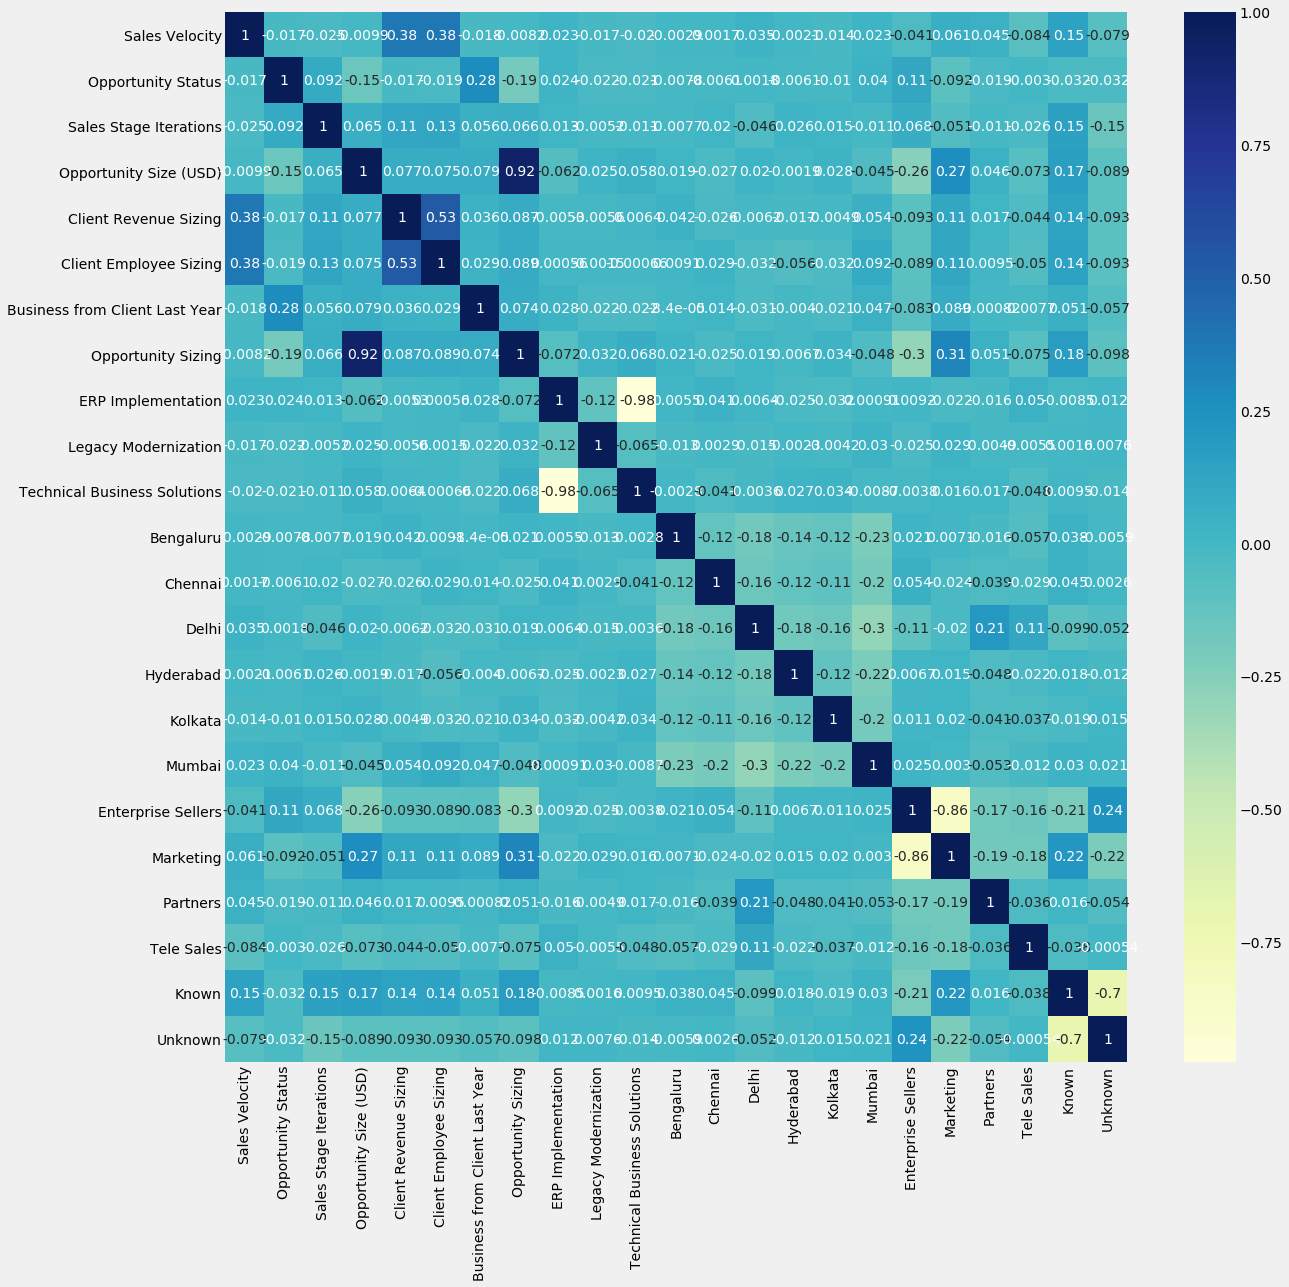

In [57]:
plt.figure(figsize=(18,18))

sb.heatmap(trans_techno.corr(), annot=True, cmap='YlGnBu')
plt.show();

- ***Observations:***
- 'Opportunity Size (USD)' and 'Opportunity Sizing' have strong positive correlation of 0.92
- 'ERP Implementation' and 'Technical Business Solutions' have strong negative correlation of -0.86
- 'Enterprise Sellers' and 'Marketing'have strong negative correlation of -0.86
- 'Known' and 'Unknown' have positive correlation of 0.70
- Even though above variables have high correlation we will not drop them, we will let `RFE` to choose features
- Tried removing highly correlated variables and building `Logistic Regression` model. However the model performs poorly, hence using `RFE` for feature selection

## Performing Train, Test split

In [58]:
# Bifurcating features and target variable

X = trans_techno.drop('Opportunity Status', axis=1)
y = trans_techno['Opportunity Status']

In [59]:
X.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Opportunity Sizing,ERP Implementation,Legacy Modernization,Technical Business Solutions,Bengaluru,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Enterprise Sellers,Marketing,Partners,Tele Sales,Known,Unknown
0,76,13,0,4.0,4.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,63,2,0,2.0,4.0,0.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,24,7,7750,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,16,5,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4,69,11,32886,0.0,0.0,0.0,3.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [60]:
X.shape, y.shape

((78025, 22), (78025,))

In [61]:
# Performing train, test split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify = y, shuffle=True, random_state=100)

In [62]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((54617, 22), (23408, 22), (54617,), (23408,))

## Feature Scaling

In [63]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [64]:
scale_vars = list(X_train.columns)

In [65]:
scaler = StandardScaler()

X_train_scaled[scale_vars] = scaler.fit_transform(X_train_scaled[scale_vars])

In [66]:
X_test_scaled[scale_vars] = scaler.transform(X_test_scaled[scale_vars])

In [67]:
X_train_scaled.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Opportunity Sizing,ERP Implementation,Legacy Modernization,Technical Business Solutions,Bengaluru,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Enterprise Sellers,Marketing,Partners,Tele Sales,Known,Unknown
25297,0.127713,-0.640343,0.536136,-0.502164,-0.498856,-0.327402,0.938878,0.746424,-0.089809,-0.727875,-0.374663,-0.326657,2.046408,-0.367446,-0.323904,-0.605605,-0.893558,-0.959707,-0.19476,5.460974,-0.427851,-1.630100
64310,-0.248129,0.033665,-0.314840,-0.502164,-0.498856,-0.327402,-0.265498,-1.339721,-0.089809,1.373862,-0.374663,-0.326657,-0.488661,-0.367446,-0.323904,-0.605605,1.119122,-0.959707,-0.19476,-0.183118,-0.427851,0.613459
76330,-1.225319,-0.640343,0.269408,-0.502164,-0.498856,-0.327402,0.336690,-1.339721,-0.089809,1.373862,-0.374663,-0.326657,-0.488661,2.721488,-0.323904,-0.605605,1.119122,-0.959707,-0.19476,-0.183118,-0.427851,0.613459
43112,-1.450824,-0.640343,0.474656,-0.502164,-0.498856,-0.327402,0.938878,0.746424,-0.089809,-0.727875,-0.374663,-0.326657,2.046408,-0.367446,-0.323904,-0.605605,-0.893558,1.041985,-0.19476,-0.183118,-0.427851,0.613459
33124,-1.112566,2.729698,-0.586181,-0.502164,-0.498856,-0.327402,-0.867686,-1.339721,-0.089809,1.373862,-0.374663,-0.326657,-0.488661,-0.367446,-0.323904,1.651241,1.119122,-0.959707,-0.19476,-0.183118,2.337260,-1.630100


## Using `RFE` for feature selection

In [68]:
# Using 'LogisticRegression' and 'RFE' for feature selection - Selecting 20 features

logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg,n_features_to_select=20)
rfe = rfe.fit(X_train_scaled,y_train)

In [69]:
# Creating dataframe of those selected features

features = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
features = pd.DataFrame(features, columns=['Feature', 'Support','Ranking'])
features = features.sort_values(by=['Support','Ranking'],ascending=[False,True])
features

,Feature,Support,Ranking
1,Sales Stage Iterations,True,1
2,Opportunity Size (USD),True,1
3,Client Revenue Sizing,True,1
4,Client Employee Sizing,True,1
5,Business from Client Last Year,True,1
6,Opportunity Sizing,True,1
7,ERP Implementation,True,1
8,Legacy Modernization,True,1
9,Technical Business Solutions,True,1
10,Bengaluru,True,1


In [70]:
# Creating dataframe of top 20 features

features = features.nlargest(20,columns=['Support'])
feat_col = features.Feature
X_train_scaled[feat_col].head()

,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Opportunity Sizing,ERP Implementation,Legacy Modernization,Technical Business Solutions,Bengaluru,Delhi,Hyderabad,Kolkata,Mumbai,Enterprise Sellers,Marketing,Partners,Tele Sales,Known,Unknown
25297,-0.640343,0.536136,-0.502164,-0.498856,-0.327402,0.938878,0.746424,-0.089809,-0.727875,-0.374663,2.046408,-0.367446,-0.323904,-0.605605,-0.893558,-0.959707,-0.19476,5.460974,-0.427851,-1.630100
64310,0.033665,-0.314840,-0.502164,-0.498856,-0.327402,-0.265498,-1.339721,-0.089809,1.373862,-0.374663,-0.488661,-0.367446,-0.323904,-0.605605,1.119122,-0.959707,-0.19476,-0.183118,-0.427851,0.613459
76330,-0.640343,0.269408,-0.502164,-0.498856,-0.327402,0.336690,-1.339721,-0.089809,1.373862,-0.374663,-0.488661,2.721488,-0.323904,-0.605605,1.119122,-0.959707,-0.19476,-0.183118,-0.427851,0.613459
43112,-0.640343,0.474656,-0.502164,-0.498856,-0.327402,0.938878,0.746424,-0.089809,-0.727875,-0.374663,2.046408,-0.367446,-0.323904,-0.605605,-0.893558,1.041985,-0.19476,-0.183118,-0.427851,0.613459
33124,2.729698,-0.586181,-0.502164,-0.498856,-0.327402,-0.867686,-1.339721,-0.089809,1.373862,-0.374663,-0.488661,-0.367446,-0.323904,1.651241,1.119122,-0.959707,-0.19476,-0.183118,2.337260,-1.630100


In [71]:
# Checking those 20 features

feat_col

1             Sales Stage Iterations
2             Opportunity Size (USD)
3              Client Revenue Sizing
4             Client Employee Sizing
5     Business from Client Last Year
6                 Opportunity Sizing
7                 ERP Implementation
8               Legacy Modernization
9       Technical Business Solutions
10                         Bengaluru
12                             Delhi
13                         Hyderabad
14                           Kolkata
15                            Mumbai
16                Enterprise Sellers
17                         Marketing
18                          Partners
19                        Tele Sales
20                             Known
21                           Unknown
Name: Feature, dtype: object

# 8. Model Building

## 1(A). Building model using `Logistic Regression`

### Running 1st Training model

In [72]:
# Building logistic regression model again after feature selection

X_train_scaled_sm = sm.add_constant(X_train_scaled[feat_col])

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Opportunity Status   No. Observations:                54617
Model:                            GLM   Df Residuals:                    54596
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25341.
Date:                Sat, 31 Jul 2021   Deviance:                       50681.
Time:                        23:11:34   Pearson chi2:                 5.36e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4347      0.012   -118.507      0.000      -1.458      -1.411
Sales Stage Iterations             0.2195      0.011     20.729      0.000       0.199       0.240
Opportunity Size (USD)             0.4172      0.030     13.985      0.000       0.359       0.476
Client Revenue Sizing             -0.0302      0.014     -2.199      0.028      -0.057      -0.003
Client Employee Sizing            -0.0264      0.014     -1.913      0.056      -0.053       0.001
Business from Client Last Year     0.6253      0.010     62.489      0.000       0.606       0.645
Opportunity Sizing                -0.9396      0.031    -30.616      0.000      -1.000      -0.879
ERP Implementation                -0.0951      0.086     -1.100      0.271      -0.265       0.074
Legacy Modernization              -0.0422      0.021     -2.010      0.044      -0.083      -0.001
Technical Business Solutions      -0.0864      0.086     -1.005      0.315      -0.255       0.082
Bengaluru                          0.0391      0.013      2.904      0.004       0.013       0.066
Delhi                              0.0927      0.015      6.321      0.000       0.064       0.121
Hyderabad                          0.0253      0.013      1.891      0.059      -0.001       0.052
Kolkata                            0.0331      0.013      2.515      0.012       0.007       0.059
Mumbai                             0.1110      0.015      7.617      0.000       0.082       0.140
Enterprise Sellers                 0.8611      0.110      7.828      0.000       0.645       1.077
Marketing                          0.6499      0.111      5.873      0.000       0.433       0.867
Partners                           0.2338      0.043      5.429      0.000       0.149       0.318
Tele Sales                         0.2166      0.041      5.333      0.000       0.137       0.296
Known                             -0.1748      0.016    -10.989      0.000      -0.206      -0.144
Unknown                           -0.2233      0.015    -15.165      0.000      -0.252      -0.194
==================================================================================================
"""

In [73]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[feat_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[feat_col].values,i) 
              for i in range(X_train_scaled[feat_col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
6,ERP Implementation,66.48
8,Technical Business Solutions,65.81
15,Marketing,33.66
14,Enterprise Sellers,33.42
5,Opportunity Sizing,7.09
1,Opportunity Size (USD),6.85
16,Partners,5.62
17,Tele Sales,5.12
7,Legacy Modernization,3.28
18,Known,2.12


### Running 2nd Training model after removing `Technical Business Solutions`

In [74]:
X_train_scaled1 = X_train_scaled[feat_col]

In [75]:
X_train_scaled1 = X_train_scaled1.drop('Technical Business Solutions', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled1)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Opportunity Status   No. Observations:                54617
Model:                            GLM   Df Residuals:                    54597
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25341.
Date:                Sat, 31 Jul 2021   Deviance:                       50682.
Time:                        23:11:39   Pearson chi2:                 5.36e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4347      0.012   -118.507      0.000      -1.458      -1.411
Sales Stage Iterations             0.2195      0.011     20.729      0.000       0.199       0.240
Opportunity Size (USD)             0.4172      0.030     13.984      0.000       0.359       0.476
Client Revenue Sizing             -0.0302      0.014     -2.202      0.028      -0.057      -0.003
Client Employee Sizing            -0.0263      0.014     -1.905      0.057      -0.053       0.001
Business from Client Last Year     0.6252      0.010     62.483      0.000       0.606       0.645
Opportunity Sizing                -0.9398      0.031    -30.624      0.000      -1.000      -0.880
ERP Implementation                -0.0090      0.011     -0.796      0.426      -0.031       0.013
Legacy Modernization              -0.0262      0.014     -1.915      0.056      -0.053       0.001
Bengaluru                          0.0391      0.013      2.903      0.004       0.013       0.066
Delhi                              0.0928      0.015      6.323      0.000       0.064       0.122
Hyderabad                          0.0253      0.013      1.885      0.059      -0.001       0.052
Kolkata                            0.0331      0.013      2.511      0.012       0.007       0.059
Mumbai                             0.1112      0.015      7.629      0.000       0.083       0.140
Enterprise Sellers                 0.8613      0.110      7.830      0.000       0.646       1.077
Marketing                          0.6503      0.111      5.877      0.000       0.433       0.867
Partners                           0.2339      0.043      5.432      0.000       0.149       0.318
Tele Sales                         0.2167      0.041      5.334      0.000       0.137       0.296
Known                             -0.1748      0.016    -10.990      0.000      -0.206      -0.144
Unknown                           -0.2232      0.015    -15.157      0.000      -0.252      -0.194
==================================================================================================
"""

In [76]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled1.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled1.values,i) 
              for i in range(X_train_scaled1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
14,Marketing,33.66
13,Enterprise Sellers,33.42
5,Opportunity Sizing,7.09
1,Opportunity Size (USD),6.85
15,Partners,5.62
16,Tele Sales,5.12
17,Known,2.12
18,Unknown,2.07
12,Mumbai,1.72
9,Delhi,1.70


### Running 3rd Training model after removing `Marketing`

In [77]:
X_train_scaled1 = X_train_scaled1.drop('Marketing', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled1)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Opportunity Status   No. Observations:                54617
Model:                            GLM   Df Residuals:                    54598
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25366.
Date:                Sat, 31 Jul 2021   Deviance:                       50732.
Time:                        23:11:42   Pearson chi2:                 5.36e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4314      0.012   -118.708      0.000      -1.455      -1.408
Sales Stage Iterations             0.2200      0.011     20.781      0.000       0.199       0.241
Opportunity Size (USD)             0.4182      0.030     14.018      0.000       0.360       0.477
Client Revenue Sizing             -0.0292      0.014     -2.130      0.033      -0.056      -0.002
Client Employee Sizing            -0.0253      0.014     -1.835      0.066      -0.052       0.002
Business from Client Last Year     0.6269      0.010     62.663      0.000       0.607       0.646
Opportunity Sizing                -0.9396      0.031    -30.620      0.000      -1.000      -0.879
ERP Implementation                -0.0096      0.011     -0.852      0.394      -0.032       0.013
Legacy Modernization              -0.0260      0.014     -1.906      0.057      -0.053       0.001
Bengaluru                          0.0382      0.013      2.835      0.005       0.012       0.065
Delhi                              0.0883      0.015      6.026      0.000       0.060       0.117
Hyderabad                          0.0225      0.013      1.680      0.093      -0.004       0.049
Kolkata                            0.0329      0.013      2.502      0.012       0.007       0.059
Mumbai                             0.1103      0.015      7.567      0.000       0.082       0.139
Enterprise Sellers                 0.2222      0.013     17.703      0.000       0.198       0.247
Partners                          -0.0069      0.012     -0.550      0.582      -0.031       0.018
Tele Sales                        -0.0106      0.012     -0.906      0.365      -0.034       0.012
Known                             -0.1726      0.016    -10.859      0.000      -0.204      -0.141
Unknown                           -0.2223      0.015    -15.114      0.000      -0.251      -0.193
==================================================================================================
"""

In [78]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled1.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled1.values,i) 
              for i in range(X_train_scaled1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
5,Opportunity Sizing,7.09
1,Opportunity Size (USD),6.85
16,Known,2.12
17,Unknown,2.07
12,Mumbai,1.72
9,Delhi,1.70
8,Bengaluru,1.42
3,Client Employee Sizing,1.42
10,Hyderabad,1.41
2,Client Revenue Sizing,1.41


### Running 4th Training model after removing `ERP Implementation`

In [79]:
X_train_scaled1 = X_train_scaled1.drop('ERP Implementation', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled1)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Opportunity Status   No. Observations:                54617
Model:                            GLM   Df Residuals:                    54599
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25366.
Date:                Sat, 31 Jul 2021   Deviance:                       50732.
Time:                        23:11:44   Pearson chi2:                 5.36e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4313      0.012   -118.714      0.000      -1.455      -1.408
Sales Stage Iterations             0.2198      0.011     20.768      0.000       0.199       0.241
Opportunity Size (USD)             0.4178      0.030     14.008      0.000       0.359       0.476
Client Revenue Sizing             -0.0292      0.014     -2.130      0.033      -0.056      -0.002
Client Employee Sizing            -0.0254      0.014     -1.843      0.065      -0.052       0.002
Business from Client Last Year     0.6265      0.010     62.684      0.000       0.607       0.646
Opportunity Sizing                -0.9385      0.031    -30.614      0.000      -0.999      -0.878
Legacy Modernization              -0.0249      0.014     -1.831      0.067      -0.052       0.002
Bengaluru                          0.0383      0.013      2.845      0.004       0.012       0.065
Delhi                              0.0884      0.015      6.033      0.000       0.060       0.117
Hyderabad                          0.0228      0.013      1.707      0.088      -0.003       0.049
Kolkata                            0.0333      0.013      2.534      0.011       0.008       0.059
Mumbai                             0.1104      0.015      7.577      0.000       0.082       0.139
Enterprise Sellers                 0.2221      0.013     17.696      0.000       0.198       0.247
Partners                          -0.0068      0.012     -0.547      0.585      -0.031       0.018
Tele Sales                        -0.0110      0.012     -0.945      0.345      -0.034       0.012
Known                             -0.1729      0.016    -10.876      0.000      -0.204      -0.142
Unknown                           -0.2225      0.015    -15.133      0.000      -0.251      -0.194
==================================================================================================
"""

In [80]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled1.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled1.values,i) 
              for i in range(X_train_scaled1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
5,Opportunity Sizing,7.08
1,Opportunity Size (USD),6.85
15,Known,2.11
16,Unknown,2.07
11,Mumbai,1.72
8,Delhi,1.70
7,Bengaluru,1.42
3,Client Employee Sizing,1.42
9,Hyderabad,1.41
2,Client Revenue Sizing,1.41


### Running 5th Training model after removing `Partners`

In [81]:
X_train_scaled1 = X_train_scaled1.drop('Partners', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled1)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Opportunity Status   No. Observations:                54617
Model:                            GLM   Df Residuals:                    54600
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25366.
Date:                Sat, 31 Jul 2021   Deviance:                       50733.
Time:                        23:11:49   Pearson chi2:                 5.36e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4313      0.012   -118.714      0.000      -1.455      -1.408
Sales Stage Iterations             0.2198      0.011     20.762      0.000       0.199       0.241
Opportunity Size (USD)             0.4178      0.030     14.006      0.000       0.359       0.476
Client Revenue Sizing             -0.0292      0.014     -2.127      0.033      -0.056      -0.002
Client Employee Sizing            -0.0254      0.014     -1.842      0.065      -0.052       0.002
Business from Client Last Year     0.6266      0.010     62.701      0.000       0.607       0.646
Opportunity Sizing                -0.9384      0.031    -30.611      0.000      -0.998      -0.878
Legacy Modernization              -0.0248      0.014     -1.827      0.068      -0.051       0.002
Bengaluru                          0.0382      0.013      2.837      0.005       0.012       0.065
Delhi                              0.0873      0.015      6.015      0.000       0.059       0.116
Hyderabad                          0.0229      0.013      1.713      0.087      -0.003       0.049
Kolkata                            0.0334      0.013      2.537      0.011       0.008       0.059
Mumbai                             0.1103      0.015      7.573      0.000       0.082       0.139
Enterprise Sellers                 0.2234      0.012     18.091      0.000       0.199       0.248
Tele Sales                        -0.0104      0.012     -0.897      0.370      -0.033       0.012
Known                             -0.1727      0.016    -10.869      0.000      -0.204      -0.142
Unknown                           -0.2225      0.015    -15.129      0.000      -0.251      -0.194
==================================================================================================
"""

In [82]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled1.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled1.values,i) 
              for i in range(X_train_scaled1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
5,Opportunity Sizing,7.08
1,Opportunity Size (USD),6.85
14,Known,2.11
15,Unknown,2.07
11,Mumbai,1.72
8,Delhi,1.66
3,Client Employee Sizing,1.42
7,Bengaluru,1.42
2,Client Revenue Sizing,1.41
9,Hyderabad,1.41


### Running 6th Training model after removing `Tele Sales`

In [83]:
X_train_scaled1 = X_train_scaled1.drop('Tele Sales', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled1)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Opportunity Status   No. Observations:                54617
Model:                            GLM   Df Residuals:                    54601
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25367.
Date:                Sat, 31 Jul 2021   Deviance:                       50733.
Time:                        23:11:52   Pearson chi2:                 5.36e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4313      0.012   -118.713      0.000      -1.455      -1.408
Sales Stage Iterations             0.2196      0.011     20.749      0.000       0.199       0.240
Opportunity Size (USD)             0.4179      0.030     14.012      0.000       0.359       0.476
Client Revenue Sizing             -0.0290      0.014     -2.112      0.035      -0.056      -0.002
Client Employee Sizing            -0.0250      0.014     -1.812      0.070      -0.052       0.002
Business from Client Last Year     0.6268      0.010     62.726      0.000       0.607       0.646
Opportunity Sizing                -0.9373      0.031    -30.599      0.000      -0.997      -0.877
Legacy Modernization              -0.0248      0.014     -1.821      0.069      -0.051       0.002
Bengaluru                          0.0387      0.013      2.874      0.004       0.012       0.065
Delhi                              0.0866      0.014      5.976      0.000       0.058       0.115
Hyderabad                          0.0231      0.013      1.730      0.084      -0.003       0.049
Kolkata                            0.0338      0.013      2.567      0.010       0.008       0.060
Mumbai                             0.1105      0.015      7.584      0.000       0.082       0.139
Enterprise Sellers                 0.2258      0.012     18.717      0.000       0.202       0.249
Known                             -0.1724      0.016    -10.850      0.000      -0.204      -0.141
Unknown                           -0.2226      0.015    -15.143      0.000      -0.251      -0.194
==================================================================================================
"""

In [84]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled1.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled1.values,i) 
              for i in range(X_train_scaled1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
5,Opportunity Sizing,7.06
1,Opportunity Size (USD),6.85
13,Known,2.11
14,Unknown,2.07
11,Mumbai,1.72
8,Delhi,1.65
3,Client Employee Sizing,1.42
7,Bengaluru,1.42
2,Client Revenue Sizing,1.41
9,Hyderabad,1.41


### Running 6th Training model after removing `Opportunity Sizing`

In [85]:
X_train_scaled1 = X_train_scaled1.drop('Opportunity Sizing', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled1)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Opportunity Status   No. Observations:                54617
Model:                            GLM   Df Residuals:                    54602
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25778.
Date:                Sat, 31 Jul 2021   Deviance:                       51555.
Time:                        23:11:54   Pearson chi2:                 5.63e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4069      0.012   -118.806      0.000      -1.430      -1.384
Sales Stage Iterations             0.2101      0.010     20.028      0.000       0.190       0.231
Opportunity Size (USD)            -0.4989      0.014    -35.972      0.000      -0.526      -0.472
Client Revenue Sizing             -0.0288      0.014     -2.117      0.034      -0.055      -0.002
Client Employee Sizing            -0.0333      0.014     -2.434      0.015      -0.060      -0.006
Business from Client Last Year     0.6224      0.010     62.398      0.000       0.603       0.642
Legacy Modernization              -0.0294      0.013     -2.188      0.029      -0.056      -0.003
Bengaluru                          0.0404      0.013      3.029      0.002       0.014       0.067
Delhi                              0.0891      0.014      6.198      0.000       0.061       0.117
Hyderabad                          0.0273      0.013      2.057      0.040       0.001       0.053
Kolkata                            0.0300      0.013      2.300      0.021       0.004       0.056
Mumbai                             0.1177      0.014      8.140      0.000       0.089       0.146
Enterprise Sellers                 0.2635      0.012     22.136      0.000       0.240       0.287
Known                             -0.1899      0.016    -12.062      0.000      -0.221      -0.159
Unknown                           -0.2319      0.015    -15.910      0.000      -0.260      -0.203
==================================================================================================
"""

- ***Observations:***
- P-values of all the variables is below 0.05, which is a good sign

In [86]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled1.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled1.values,i) 
              for i in range(X_train_scaled1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
12,Known,2.11
13,Unknown,2.06
10,Mumbai,1.72
7,Delhi,1.65
3,Client Employee Sizing,1.42
6,Bengaluru,1.42
2,Client Revenue Sizing,1.41
8,Hyderabad,1.41
9,Kolkata,1.34
11,Enterprise Sellers,1.18


- ***Observations:***
- VIF of all the variables is below 2.20, which is a good sign

## 1(B). Model Evaluation

In [87]:
# Getting prediction on train set

y_train_pred = log_ml.predict(X_train_scaled_sm)
y_train_pred[:10]

25297    0.157207
64310    0.209392
76330    0.157442
43112    0.102600
33124    0.409536
74936    0.388026
75069    0.437390
57405    0.310595
13800    0.193689
2911     0.194502
dtype: float64

In [88]:

# y_train_pred = y_train_pred.values.reshape(-1)
# y_train_pred[:10]

## Creating a dataframe actual churn flag and the predicted probabilities

In [89]:
y_train_pred_final = pd.DataFrame({'Opportunity Status':y_train.values, 'Status_prob':y_train_pred})
y_train_pred_final['Opportunity ID'] = y_train.index
y_train_pred_final = y_train_pred_final.reset_index()
y_train_pred_final = y_train_pred_final.drop('index', axis=1)
y_train_pred_final.head()

,Opportunity Status,Status_prob,Opportunity ID
0,0,0.157207,25297
1,1,0.209392,64310
2,1,0.157442,76330
3,0,0.102600,43112
4,0,0.409536,33124


## Creating new column 'Predicted' with 1 if Prob>0.50 else 0

In [90]:
y_train_pred_final['Predicted'] = y_train_pred_final.Status_prob.map(lambda x: 1 if x>0.50 else 0)
y_train_pred_final.head()

,Opportunity Status,Status_prob,Opportunity ID,Predicted
0,0,0.157207,25297,0
1,1,0.209392,64310,0
2,1,0.157442,76330,0
3,0,0.102600,43112,0
4,0,0.409536,33124,0


In [91]:
CM = confusion_matrix(y_train_pred_final['Opportunity Status'], y_train_pred_final['Predicted'])
print(CM)

[[40747  1531]
 [10103  2236]]


In [92]:
print(classification_report(y_train_pred_final['Opportunity Status'], y_train_pred_final['Predicted']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88     42278
           1       0.59      0.18      0.28     12339

    accuracy                           0.79     54617
   macro avg       0.70      0.57      0.58     54617
weighted avg       0.75      0.79      0.74     54617



In [93]:
# Checking Accuracy score

accuracy_score(y_train_pred_final['Opportunity Status'], y_train_pred_final['Predicted'])

0.7869893989051028

In [94]:
# Checking Recall score

recall_score(y_train_pred_final['Opportunity Status'], y_train_pred_final['Predicted'])

0.1812140367939055

In [95]:
# Checking Precicion score

precision_score(y_train_pred_final['Opportunity Status'], y_train_pred_final['Predicted'])

0.5935757897531192

- ***Observations:***
- We can see bad `Recall Score` and  not so good `Precision Score`

## Plotting ROC Curve

In [96]:
def draw_curve(actual, probs):
    fpr,tpr,thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
#     plt.style.use('fivethirtyeight')
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    return None

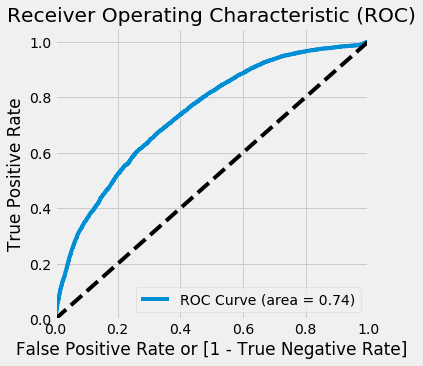

In [97]:
draw_curve(y_train_pred_final['Opportunity Status'], y_train_pred_final['Status_prob'])

- ***Observations:***
- The area under the curve is 74%, let us check whether we can get a better AUC

## Finding optimal cutoff point

In [98]:
nums = [x/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i] = y_train_pred_final.Status_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Opportunity Status,Status_prob,Opportunity ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.157207,25297,0,1,1,0,0,0,0,0,0,0,0
1,1,0.209392,64310,0,1,1,1,0,0,0,0,0,0,0
2,1,0.157442,76330,0,1,1,0,0,0,0,0,0,0,0
3,0,0.102600,43112,0,1,1,0,0,0,0,0,0,0,0
4,0,0.409536,33124,0,1,1,1,1,1,0,0,0,0,0


In [99]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci', 'preci'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Opportunity Status'], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0] + cm1[1,1])
    preci = cm1[0,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci, preci]
print(cutoff_df)

     prob  accuracy     sensi     speci     preci
0.0   0.0  0.225919  1.000000  0.000000  0.774081
0.1   0.1  0.390941  0.960045  0.224845  0.734502
0.2   0.2  0.631470  0.735716  0.601045  0.650106
0.3   0.3  0.761155  0.424102  0.859525  0.531597
0.4   0.4  0.788656  0.269066  0.940300  0.431896
0.5   0.5  0.786989  0.181214  0.963787  0.406424
0.6   0.6  0.785525  0.120998  0.979469  0.367641
0.7   0.7  0.781185  0.064592  0.990326  0.339138
0.8   0.8  0.776754  0.023341  0.996641  0.330233
0.9   0.9  0.774283  0.001459  0.999834  0.280000


- ***Observations:***
- Accuracy is good i.e around 79%. However, Sensitivity/Recall is very poor i.e. around 18%
- Choosing `prob == 0.2` gives better `Sensitivity = 0.74`, `Accuracy = 0.63` and `Precision = 0.59`, however that might not be a good idea as threshold will be too low and also accuracy and specificity reduces

## Predicting the Test Data

In [100]:
X_test_scaled1 = X_test_scaled.copy()

In [101]:
# Checking the head

X_test_scaled1.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Opportunity Sizing,ERP Implementation,Legacy Modernization,Technical Business Solutions,Bengaluru,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Enterprise Sellers,Marketing,Partners,Tele Sales,Known,Unknown
56974,-0.097792,0.033665,-0.713048,1.123026,1.974306,-0.327402,-0.867686,-1.339721,-0.089809,1.373862,-0.374663,-0.326657,-0.488661,-0.367446,3.087333,-0.605605,1.119122,-0.959707,-0.19476,-0.183118,-0.427851,0.613459
44892,-1.563577,-0.640343,-0.807198,-0.502164,-0.498856,1.809771,-0.867686,0.746424,-0.089809,-0.727875,-0.374663,-0.326657,2.046408,-0.367446,-0.323904,-0.605605,-0.893558,1.041985,-0.19476,-0.183118,-0.427851,0.613459
70550,-0.999813,0.033665,-1.414231,-0.502164,-0.498856,-0.327402,-1.469874,-1.339721,-0.089809,1.373862,-0.374663,-0.326657,-0.488661,-0.367446,3.087333,-0.605605,-0.893558,1.041985,-0.19476,-0.183118,-0.427851,-1.630100
36998,-0.811892,0.033665,3.032197,-0.502164,-0.498856,-0.327402,2.143254,0.746424,-0.089809,-0.727875,2.669064,-0.326657,-0.488661,-0.367446,-0.323904,-0.605605,-0.893558,1.041985,-0.19476,-0.183118,-0.427851,0.613459
11278,0.014960,0.033665,-0.209769,-0.502164,-0.498856,-0.327402,-0.265498,0.746424,-0.089809,-0.727875,-0.374663,-0.326657,-0.488661,-0.367446,-0.323904,1.651241,1.119122,-0.959707,-0.19476,-0.183118,-0.427851,0.613459


In [102]:
# Checking shape

X_test_scaled1.shape

(23408, 22)

In [103]:
# Using those features in 'X_test_scaled' which are in the final model

X_test_scaled1 = X_test_scaled1[list(X_train_scaled1.columns)]
X_test_scaled1.head()

,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Legacy Modernization,Bengaluru,Delhi,Hyderabad,Kolkata,Mumbai,Enterprise Sellers,Known,Unknown
56974,0.033665,-0.713048,1.123026,1.974306,-0.327402,-0.089809,-0.374663,-0.488661,-0.367446,3.087333,-0.605605,1.119122,-0.427851,0.613459
44892,-0.640343,-0.807198,-0.502164,-0.498856,1.809771,-0.089809,-0.374663,2.046408,-0.367446,-0.323904,-0.605605,-0.893558,-0.427851,0.613459
70550,0.033665,-1.414231,-0.502164,-0.498856,-0.327402,-0.089809,-0.374663,-0.488661,-0.367446,3.087333,-0.605605,-0.893558,-0.427851,-1.630100
36998,0.033665,3.032197,-0.502164,-0.498856,-0.327402,-0.089809,2.669064,-0.488661,-0.367446,-0.323904,-0.605605,-0.893558,-0.427851,0.613459
11278,0.033665,-0.209769,-0.502164,-0.498856,-0.327402,-0.089809,-0.374663,-0.488661,-0.367446,-0.323904,1.651241,1.119122,-0.427851,0.613459


In [104]:
X_test_scaled1.shape

(23408, 14)

In [105]:
# Adding constant to 'X_test_scaled'

X_test_scaled_sm = sm.add_constant(X_test_scaled1)

- **Predicting X_test**

In [106]:
# Predicting the 'X_test_scaled_sm'

y_test_pred = log_ml.predict(X_test_scaled_sm)
y_test_pred[:10]

56974    0.239284
44892    0.450424
70550    0.334492
36998    0.032111
11278    0.246885
34081    0.182486
4606     0.111035
1919     0.326824
54950    0.351642
27320    0.315935
dtype: float64

- **Creating a dataframe actual Converted flag and the predicted probabilities**

In [107]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Convert_prob':y_test_pred})
y_test_pred_final['Status ID'] = y_test.index
y_test_pred_final.head()

,Converted,Convert_prob,Status ID
56974,1,0.239284,56974
44892,0,0.450424,44892
70550,0,0.334492,70550
36998,0,0.032111,36998
11278,0,0.246885,11278


- **Creating new column 'Predicted' with 1 if Prob>0.50 else 0**

In [108]:
y_test_pred_final['Predicted'] = y_test_pred_final.Convert_prob.map(lambda x:\
                                                                    1 if x>0.40 else 0)
y_test_pred_final.head()

,Converted,Convert_prob,Status ID,Predicted
56974,1,0.239284,56974,0
44892,0,0.450424,44892,1
70550,0,0.334492,70550,0
36998,0,0.032111,36998,0
11278,0,0.246885,11278,0


In [109]:
# Using confusion matrix

CM = confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Predicted'])
print(CM)

[[17016  1104]
 [ 3855  1433]]


In [110]:
# Checking Accuracy

accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Predicted'])

0.7881493506493507

In [112]:
# Checking specificity

CM[0,0]/(CM[0,0]+CM[0,1])

0.9390728476821192

In [147]:
# Checking Sensitivity/Recall

recall_score(y_test_pred_final['Converted'], y_test_pred_final['Predicted'])

0.18305597579425115

In [148]:
# Checking Precision score

precision_score(y_test_pred_final['Converted'], y_test_pred_final['Predicted'])

0.6016159105034182

### Conclusion for `Logistic Regression`
- The observations are disappointing, `Logistic Regression` model does not yield good results
- If we want better sensitivity then we will have to compromise on accuracy and specificity
- If we choose accuracy then sensitivity and specificity become very low
- Since we have to increase conversions, we need sensitivity to be more
- Choosing `prob == 0.5` for Test set gives, `Accuracy = 0.79`, `Sensitivity = 0.18` and `Precision = 0.60`, however that might not be a good idea
- It seems `Logistic Regression` might `not be a good model` for this dataset, need to try some other model

## 2(A). Building model with `Decision Tree Classifier`

In [89]:
# Importing libraries related to 'Decision Trees'

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

### Using default parameters

In [90]:
def evaluate_model(dt_classifier):
    
    y_train_pred = dt_classifier.predict(X_train)
    print('Train set performance')
    print(confusion_matrix(y_train, y_train_pred))
    print('Accuracy score is: ',accuracy_score(y_train, y_train_pred))
    print('Specificity score', confusion_matrix(y_train, y_train_pred)[0,0]/(confusion_matrix(y_train, y_train_pred)[0,0]+confusion_matrix(y_train, y_train_pred)[0,1]))
    print('Recall score is: ',recall_score(y_train, y_train_pred))
    print('Precision score is: ',recall_score(y_train, y_train_pred))
    print('-'*50)
    y_test_pred = dt_classifier.predict(X_test)
    print('Test set performance')
    print(confusion_matrix(y_test, y_test_pred))
    print('Accuracy score is: ',accuracy_score(y_test, y_test_pred))
    print('Specificity score', confusion_matrix(y_test, y_test_pred)[0,0]/(confusion_matrix(y_test, y_test_pred)[0,0]+confusion_matrix(y_test, y_test_pred)[0,1]))
    print('Recall score is: ',recall_score(y_test, y_test_pred))
    print('Precision score is: ',recall_score(y_test, y_test_pred))

In [91]:
dt_base = DecisionTreeClassifier()

In [92]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [93]:
evaluate_model(dt_base)

Train set performance
[[42301     3]
 [   50 12263]]
Accuracy score is:  0.9990296061665782
Specificity score 0.999929084720121
Recall score is:  0.9959392511979209
Precision score is:  0.9959392511979209
--------------------------------------------------
Test set performance
[[15583  2511]
 [ 2291  3023]]
Accuracy score is:  0.7948564593301436
Specificity score 0.8612247153752626
Recall score is:  0.5688746706812194
Precision score is:  0.5688746706812194


- ***Observations:***
- We can see clear case of overfitting when we look at training results
- **Using default parameters on Test set:**
- `Accuracy = 0.80`, `Precision = 0.56` and `Recall = 0.56`
- Precision and Recall scores are not that bad

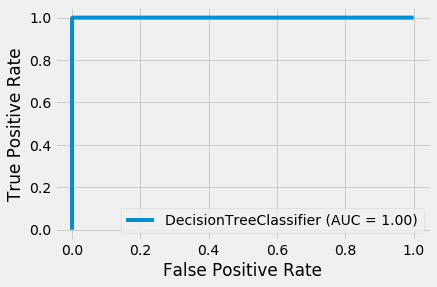

In [94]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show();

In [96]:
imp_df = pd.DataFrame(dt_base.feature_importances_, columns=['Importance']).sort_values(by='Importance', ascending=False)

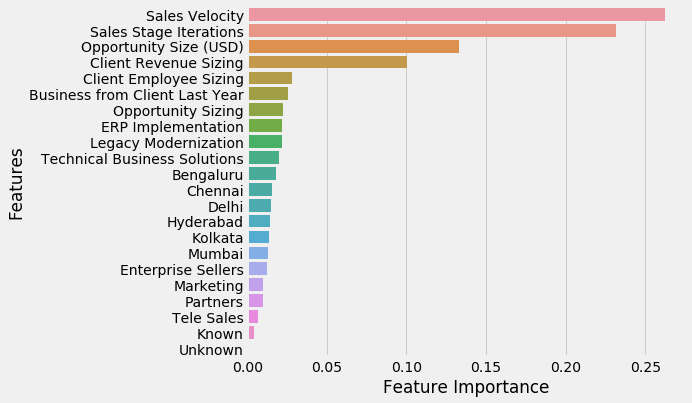

In [97]:
# Plotting feature importance

plt.figure(figsize=(7,6))
sb.barplot(imp_df.Importance, X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show();

## Grid Search for finding optimum Hyperparameters

In [111]:
dt_gs = DecisionTreeClassifier(random_state=42)

In [112]:
params = {'max_depth': [2,3,5,8,10,12,14,20], 
         'min_samples_leaf': [10,15,20,25,30,35,40,50],
         'min_samples_split': [10,15,20,30,50,60,80,100],
         'criterion': ['gini', 'entropy']}

In [113]:
grid_search = GridSearchCV(estimator=dt_gs,
            param_grid=params,
            cv=10,
            n_jobs=-1, verbose=1,
            scoring='accuracy')

In [114]:
%%time
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 1024 candidates, totalling 10240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 10240 out of 10240

Wall time: 13min 48s


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [115]:
cv_gs_df = pd.DataFrame(grid_search.cv_results_)
cv_gs_df.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
989,0.997887,0.170691,0.008079,0.003410,entropy,20,25,60,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.847309,0.848041,0.850055,0.853900,0.852801,0.843830,0.846759,0.852408,0.844351,0.850577,0.849003,0.003329,1
911,0.739919,0.039063,0.006184,0.000746,entropy,14,15,100,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.847309,0.847675,0.852984,0.847126,0.855181,0.840535,0.849689,0.851309,0.844534,0.851309,0.848765,0.004055,2
917,0.709783,0.017548,0.006851,0.007375,entropy,14,20,60,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.846759,0.848407,0.851337,0.854998,0.856463,0.839253,0.844013,0.849112,0.844717,0.852408,0.848747,0.005017,3
990,0.986413,0.184731,0.006981,0.001411,entropy,20,25,80,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.846943,0.846027,0.849323,0.851886,0.850055,0.843464,0.847126,0.853140,0.845999,0.853140,0.848710,0.003150,4
910,0.750292,0.036057,0.008179,0.005691,entropy,14,15,80,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.848590,0.844929,0.852435,0.850787,0.853167,0.839802,0.846576,0.852042,0.845999,0.852774,0.848710,0.004138,5


## 2(B1). Model Evaluation

In [116]:
grid_search.best_score_

0.849003063633336

In [117]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [118]:
dt_gs_best = grid_search.best_estimator_

In [119]:
evaluate_model(dt_gs_best)

Train set performance
[[40333  1971]
 [ 5399  6914]]
Accuracy score is:  0.8650603292015306
Specificity score 0.9534086611195158
Recall score is:  0.5615203443514984
Precision score is:  0.5615203443514984
--------------------------------------------------
Test set performance
[[17056  1038]
 [ 2582  2732]]
Accuracy score is:  0.845352016404648
Specificity score 0.9426329169890572
Recall score is:  0.51411366202484
Precision score is:  0.51411366202484


- ***Observations:***
- **Using params = {'max_depth':20, 'min_samples_leaf':25, 'min_samples_split':60, 'criterion':'entropy'}** on Test set
- `Accuracy = 0.84`, `Recall = 0.51` and `Precision = 0.51`
- Time taken to run the GridSearchCV is `13 mins and 31 secs`
- Precision and Recall scores are 50% each, not good

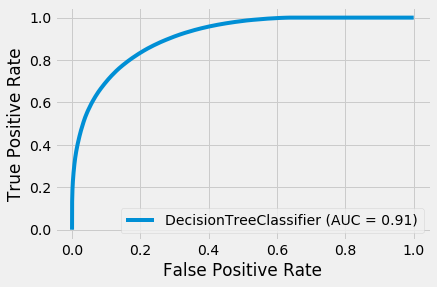

In [120]:
plot_roc_curve(dt_gs_best, X_train, y_train, drop_intermediate=False)
plt.show();

In [121]:
gs_dict = {'Features':list(X_train.columns), 'Importance':list(dt_gs_best.feature_importances_)}
imp_gs_df = pd.DataFrame(gs_dict).sort_values(by='Importance', ascending=False)
imp_gs_df.head()

,Features,Importance
0,Sales Velocity,0.251320
5,Business from Client Last Year,0.226641
2,Opportunity Size (USD),0.196786
1,Sales Stage Iterations,0.168799
16,Enterprise Sellers,0.056128


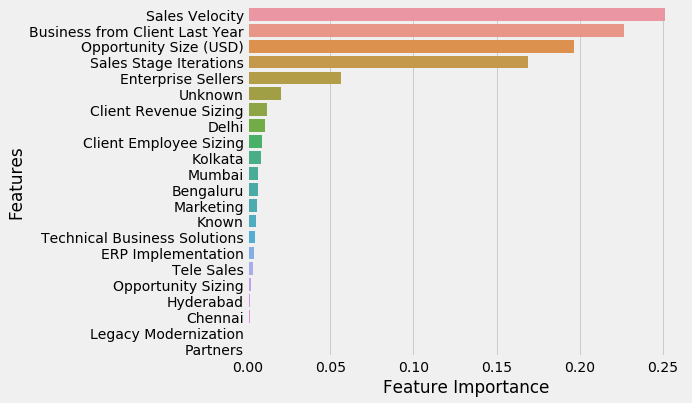

In [122]:
# Plotting feature importance

plt.figure(figsize=(7,6))
sb.barplot(imp_gs_df.Importance, imp_gs_df.Features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show();

- ***Observations:***
- For `GridSearchCV` top 5 important features are **{'Sales Velocity':0.29,'Business from Client Last Year':0.23,'Opportunity Size (USD)':0.20,'Sales Stage Iterations':0.17,'Enterprise Sellers':0.06}**


## Hyper-Parameter tuning using 'RandomizedSearchCV'

In [98]:
dt_rs = DecisionTreeClassifier(random_state=42)

In [99]:
params = {'max_depth': [2,3,5,8,10,12,14,20,23,25,28,30,33,35,38,40,42,44,46,48,50], 
         'min_samples_leaf': [5,10,15,20,25,30,35,40,45,50,100,200,300,500],
         'min_samples_split': [5,10,15,20,25,30,35,40,45,50,100,200,300,500],
         'criterion': ['gini', 'entropy']}

In [100]:
random_search = RandomizedSearchCV(estimator=dt_rs,
            param_distributions=params,
            cv=10,
            n_jobs=-1, verbose=1,
            scoring='accuracy')

In [101]:
%%time
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.8s finished


Wall time: 15.8 s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
           

In [102]:
cv_rs_df = pd.DataFrame(random_search.cv_results_)
cv_rs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.771399,0.078552,0.009561,0.002140,35,15,10,gini,"{'min_samples_split': 35, 'min_samples_leaf': ...",0.842549,0.843098,0.847309,0.844929,0.846759,0.835225,0.839070,0.844168,0.843435,0.845633,0.843217,0.003472,5
1,0.232508,0.040920,0.009522,0.004604,100,5,2,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.814720,0.815452,0.819114,0.817100,0.818748,0.806115,0.805200,0.815418,0.816517,0.816700,0.814508,0.004622,10
2,1.085459,0.080399,0.016284,0.008839,25,35,23,gini,"{'min_samples_split': 25, 'min_samples_leaf': ...",0.848224,0.852435,0.847492,0.846393,0.852984,0.839436,0.841084,0.851492,0.843618,0.851492,0.847465,0.004575,1
3,0.337247,0.041370,0.014910,0.009171,10,45,3,gini,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.825888,0.821860,0.832662,0.829550,0.831930,0.820579,0.823874,0.830434,0.822926,0.826772,0.826647,0.004108,8
4,1.022972,0.084852,0.005713,0.009828,100,50,44,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.842915,0.849872,0.848773,0.843647,0.854815,0.842365,0.846943,0.849661,0.840872,0.848196,0.846806,0.004094,2


## 2(B2). Model Evaluation

In [103]:
random_search.best_score_

0.847465152017324

In [104]:
random_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=23, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [105]:
dt_rs_best = random_search.best_estimator_

In [106]:
evaluate_model(dt_rs_best)

Train set performance
[[40272  2032]
 [ 5544  6769]]
Accuracy score is:  0.8612886097735137
Specificity score 0.9519667170953101
Recall score is:  0.5497441728254691
Precision score is:  0.5497441728254691
--------------------------------------------------
Test set performance
[[17106   988]
 [ 2565  2749]]
Accuracy score is:  0.8482142857142857
Specificity score 0.9453962639549022
Recall score is:  0.5173127587504704
Precision score is:  0.5173127587504704


- ***Observations:***
- **Using params = {'max_depth':12, 'min_samples_leaf':25, 'min_samples_split':15, 'criterion':'entropy'}** on Test set
- `Accuracy = 0.84`, `Recall = 0.50` and `Precision = 0.50`
- Time taken to run the RandomizedSearchCV is `14.6 secs`
- Precision and Recall scores are 50% each, not good

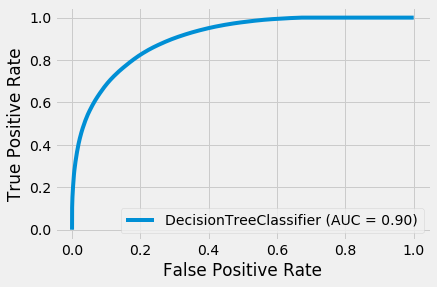

In [107]:
plot_roc_curve(dt_rs_best, X_train, y_train, drop_intermediate=False)
plt.show();

In [108]:
rs_dict = {'Features':list(X_train.columns), 'Importance':list(dt_rs_best.feature_importances_)}
imp_rs_df = pd.DataFrame(rs_dict).sort_values(by='Importance', ascending=False)
imp_rs_df.head()

,Features,Importance
5,Business from Client Last Year,0.295744
0,Sales Velocity,0.248995
2,Opportunity Size (USD),0.165524
1,Sales Stage Iterations,0.163683
16,Enterprise Sellers,0.051134


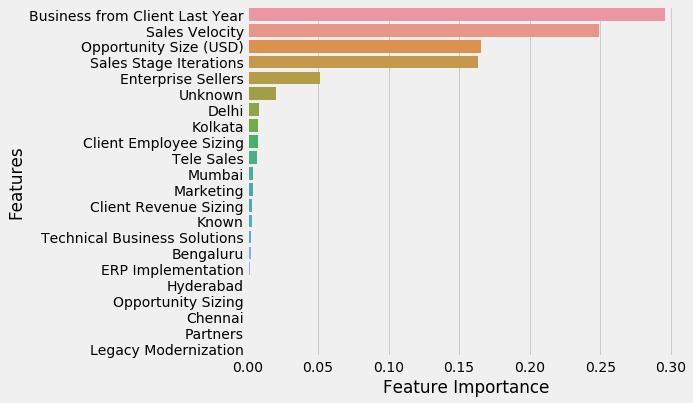

In [109]:
# Plotting feature importance

plt.figure(figsize=(7,6))
sb.barplot(imp_rs_df.Importance, imp_rs_df.Features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show();

- ***Observations:***
- For `RandomizedSearchCV` top 5 important features are **{'Business from Client Last Year':0.29',Sales Velocity':0.25,'Opportunity Size (USD)':0.163,'Sales Stage Iterations':0.161,'Enterprise Sellers':0.05}**


### Conclusion for `Decision Tree Classifier`
- Decision Tree with `default parameters` gives where **{'max_depth':'None', 'min_samples_leaf':1, 'min_samples_split':2, 'criterion':'gini'}** `Accuracy` of 0.80, `Precision` and `Recall` of 0.56 each
- Decision Tree with `GridSearchCV` parameters gives where **{'max_depth':20, 'min_samples_leaf':25, 'min_samples_split':60, 'criterion':'entropy'}** `Accuracy` of 0.84, `Precision` and `Recall` of 0.51 each
- Decision Tree with `RandomizedSearchCV` parameters gives where **{'max_depth':12, 'min_samples_leaf':25, 'min_samples_split':15, 'criterion':'entropy'}**** `Accuracy` of 0.84, `Precision` and `Recall` of 0.50 each
- It seems for this data set performance of `default parameters` are `better than` GridSearchCV and RandomizedSearchCV

## 3(A). Building model with `Random Forest Classifier`

In [59]:
# Importing libraries related to 'Decision Trees'

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

## Base model

In [60]:
rf_base = RandomForestClassifier(random_state=42)

In [64]:
rf_base.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [66]:
def evaluate_model(dt_classifier):
    
    y_train_pred = dt_classifier.predict(X_train)
    print('Train set performance')
    print(confusion_matrix(y_train, y_train_pred))
    print('Accuracy score is: ',accuracy_score(y_train, y_train_pred))
    print('Specificity score', confusion_matrix(y_train, y_train_pred)[0,0]/(confusion_matrix(y_train, y_train_pred)[0,0]+confusion_matrix(y_train, y_train_pred)[0,1]))
    print('Recall score is: ',recall_score(y_train, y_train_pred))
    print('Precision score is: ',recall_score(y_train, y_train_pred))
    print('-'*50)
    y_test_pred = dt_classifier.predict(X_test)
    print('Test set performance')
    print(confusion_matrix(y_test, y_test_pred))
    print('Accuracy score is: ',accuracy_score(y_test, y_test_pred))
    print('Specificity score', confusion_matrix(y_test, y_test_pred)[0,0]/(confusion_matrix(y_test, y_test_pred)[0,0]+confusion_matrix(y_test, y_test_pred)[0,1]))
    print('Recall score is: ',recall_score(y_test, y_test_pred))
    print('Precision score is: ',recall_score(y_test, y_test_pred))

In [67]:
evaluate_model(rf_base)

Train set performance
[[42290    14]
 [   41 12272]]
Accuracy score is:  0.9989929875313547
Specificity score 0.9996690620272315
Recall score is:  0.9966701859822952
Precision score is:  0.9966701859822952
--------------------------------------------------
Test set performance
[[17044  1050]
 [ 2581  2733]]
Accuracy score is:  0.844882091592618
Specificity score 0.9419697137172544
Recall score is:  0.5143018441851712
Precision score is:  0.5143018441851712


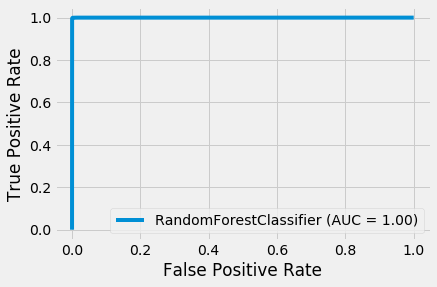

In [70]:
plot_roc_curve(rf_base, X_train, y_train, drop_intermediate=False)
plt.show();

- ***Observations:***
- Clear Case of overfitting
- Training Accuracy shows 0.99 however, test Accuracy is just 0.84

## Hyper-Parameter tuning using 'GridSearchCV'

In [71]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [72]:
params = {'max_depth': [2,3,5,10,20], 
         'min_samples_leaf': [5,10,20,50,100,200],
         'max_features':[11, 1, 9, 5, 6, 'auto'],
         'n_estimators':[10,30,50,100,200]}

In [73]:
grid_search = GridSearchCV(estimator=rf,
            param_grid=params,
            cv=5,
            n_jobs=-1, verbose=1,
            scoring='accuracy')

In [75]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 63.8min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 75.7min finished


Wall time: 1h 15min 50s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [76]:
# Best score for random forest classifier with gridsearchcv

grid_search.best_score_

0.8585422229096569

In [77]:
# Best estimator for random forest classifier with gridsearchcv

grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [78]:
# Best estimator for random forest classifier with gridsearchcv to an object

rf_best = grid_search.best_estimator_

In [79]:
evaluate_model(rf_best)

Train set performance
[[41308   996]
 [ 4516  7797]]
Accuracy score is:  0.8990790413241299
Specificity score 0.9764561270801816
Recall score is:  0.6332331681962153
Precision score is:  0.6332331681962153
--------------------------------------------------
Test set performance
[[17216   878]
 [ 2484  2830]]
Accuracy score is:  0.8563738892686261
Specificity score 0.9514756272797612
Recall score is:  0.5325555137372977
Precision score is:  0.5325555137372977


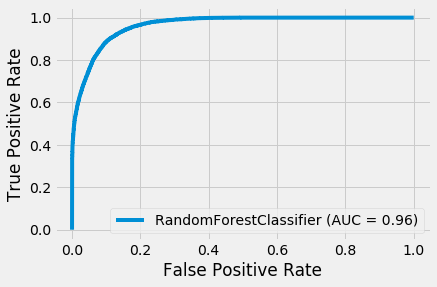

In [80]:
plot_roc_curve(rf_best, X_train, y_train, drop_intermediate=False)
plt.show();

In [83]:
# Checking important features

rf_best.feature_importances_

array([2.41259482e-01, 1.36999647e-01, 1.92928918e-01, 1.86392134e-02,
       1.78192039e-02, 2.15088945e-01, 3.23764734e-02, 9.70958218e-03,
       1.24431517e-04, 9.33156224e-03, 7.80205640e-03, 5.67727895e-03,
       1.20520355e-02, 6.04482836e-03, 7.95040446e-03, 1.26719877e-02,
       3.04494946e-02, 1.36090062e-02, 1.82792151e-03, 4.66022997e-03,
       7.05989084e-03, 1.59174072e-02])

In [84]:
# Creating dataframe of important features

feat_imp = pd.DataFrame({'Features': X_train.columns, 'Importance':rf_best.feature_importances_})

In [110]:
# Sorting and displaying the imp features dataframe

feat_imp = feat_imp.sort_values(by='Importance',ascending=False)
feat_imp.head()

,Features,Importance
0,Sales Velocity,0.241259
5,Business from Client Last Year,0.215089
2,Opportunity Size (USD),0.192929
1,Sales Stage Iterations,0.137000
6,Opportunity Sizing,0.032376


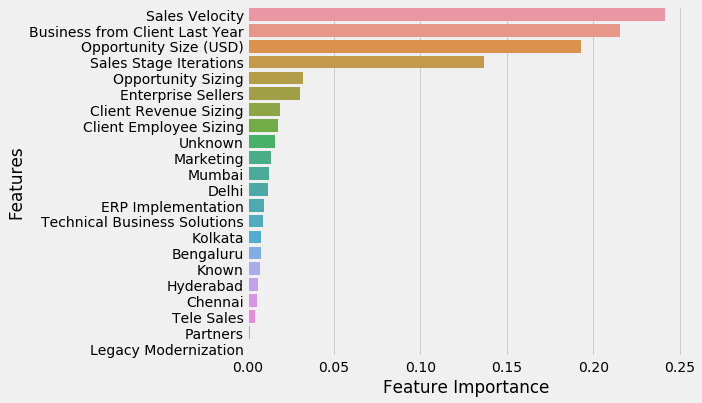

In [88]:
# Plotting feature importance

plt.figure(figsize=(7,6))
sb.barplot(feat_imp.Importance, feat_imp.Features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show();

- ***Observations:***
- For `GridSearchCV` top 5 important features are **{Sales Velocity':0.24,'Business from Client Last Year':0.22','Opportunity Size (USD)':0.19,'Sales Stage Iterations':0.13,'Opportunity Sizing':0.03}**


### Conclusion for `Random Forest Classifier`
- Random Forest with `default parameters` gives Test set results of `Accuracy`= 0.84, `Precision`= 0.51 `Recall` = 0.51 where **{'max_depth':'None', 'min_samples_leaf':1, 'min_samples_split':2, max_features='auto','criterion':'gini'}** 
- Random Forest with `GridSearchCV` parameters gives Test set results of `Accuracy`= 0.86, `Precision`= 0.50 `Recall` = 0.50 where **{'max_depth':20, 'min_samples_leaf':5, 'min_samples_split':2, max_features=11,'criterion':'gini'}** 
- Random Forest with `GridSearchCV` parameters gives good accuracy of 0.86
- Random Forest with `default parameters` gives better precision and recall of 0.51 each

## 4(A). Building model with `Support Vector Machines`

## Building SVC model using `Linear` kernel

In [45]:
# Importing libraries related to 'SVM'

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC

In [100]:
%%time
# Instantiate object class

svm_linear = SVC(C=1, kernel='linear')

# fit

svm_linear.fit(X_train_scaled, y_train)

Wall time: 4min 1s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
def evaluate_model(SVM_classifier):
    
    y_train_pred = SVM_classifier.predict(X_train_scaled)
    print('Train set performance')
    print(confusion_matrix(y_train, y_train_pred))
    print('Accuracy score is: ',accuracy_score(y_train, y_train_pred))
    print('Specificity score', confusion_matrix(y_train, y_train_pred)[0,0]/(confusion_matrix(y_train, y_train_pred)[0,0]+confusion_matrix(y_train, y_train_pred)[0,1]))
    print('Recall score is: ',recall_score(y_train, y_train_pred))
    print('Precision score is: ',recall_score(y_train, y_train_pred))
    print('-'*50)
    y_test_pred = SVM_classifier.predict(X_test_scaled[list(X_train_scaled.columns)])
    print('Test set performance')
    print(confusion_matrix(y_test, y_test_pred))
    print('Accuracy score is: ',accuracy_score(y_test, y_test_pred))
    print('Specificity score', confusion_matrix(y_test, y_test_pred)[0,0]/(confusion_matrix(y_test, y_test_pred)[0,0]+confusion_matrix(y_test, y_test_pred)[0,1]))
    print('Recall score is: ',recall_score(y_test, y_test_pred))
    print('Precision score is: ',recall_score(y_test, y_test_pred))

In [102]:
%%time
evaluate_model(svm_linear)

Train set performance
[[40494  1810]
 [10028  2285]]
Accuracy score is:  0.7832542981123094
Specificity score 0.957214447806354
Recall score is:  0.18557622025501502
Precision score is:  0.18557622025501502
--------------------------------------------------
Test set performance
[[17346   748]
 [ 4314  1000]]
Accuracy score is:  0.7837491455912509
Specificity score 0.9586603293909584
Recall score is:  0.1881821603312006
Precision score is:  0.1881821603312006
Wall time: 1min 33s


- ***Observations:***
- **Using params = {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}** on Test set
- `Accuracy = 0.78`, `Precision = 0.19` and `Recall = 0.19`
- Time taken to run the model is `2 hrs 45 mins and 20 secs`
- Precision and Recall scores are very poor

## Building SVC model using `RBF` kernel

In [103]:
%%time
# Instantiate object class

svm_rbf = SVC(C=1, kernel='rbf')

# fit

svm_rbf.fit(X_train_scaled, y_train)

Wall time: 4min 58s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [104]:
%%time
evaluate_model(svm_rbf)

Train set performance
[[41179  1125]
 [ 8450  3863]]
Accuracy score is:  0.8246882838676602
Specificity score 0.9734067700453858
Recall score is:  0.31373345244863154
Precision score is:  0.31373345244863154
--------------------------------------------------
Test set performance
[[17538   556]
 [ 3706  1608]]
Accuracy score is:  0.8179254955570745
Specificity score 0.9692715817398032
Recall score is:  0.3025969138125706
Precision score is:  0.3025969138125706
Wall time: 2min 22s


- ***Observations:***
- **Using params = {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}** on Test set
- `Accuracy = 0.82`, `Precision = 0.30` and `Recall = 0.30`
- Time taken to run the model is `2 hrs 45 mins and 20 secs`
- Precision and Recall scores are poor but are better when compared with 'linear kernel'

## Grid Search for finding optimum Hyperparameters

In [47]:
# Creating a KFold object with 10 splits
folds = KFold(n_splits=2, shuffle=True, random_state=4)

# selecting params to grid search
hyper_params = [{'C':[1,10,100,1000],'gamma':[1e-1,1e-2,1e-3,1e-4]}]
# scores = ['accuracy', 'precision'. 'recall']

# Instantiate the model
svc_gs = SVC(kernel='rbf')

# Perform grid search
grid_cv = GridSearchCV(estimator=svc_gs, param_grid=hyper_params, scoring='accuracy', 
                       cv=folds, verbose=1, return_train_score=True, n_jobs=-1)

In [48]:
%%time
# Fitting training data

grid_cv.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 46.4min finished


Wall time: 1h 20min 8s


GridSearchCV(cv=KFold(n_splits=2, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [43]:
# Creating a data frame out of grid search results

grid_cv_results = pd.DataFrame(grid_cv.cv_results_)
grid_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,146.589392,1.208766,34.793379,0.059342,1,0.1,"{'C': 1, 'gamma': 0.1}",0.823428,0.817380,0.820404,0.003024,3,0.837960,0.838991,0.838475,0.000516
1,92.669202,1.045700,32.745863,0.065319,1,0.01,"{'C': 1, 'gamma': 0.01}",0.814933,0.814047,0.814490,0.000443,6,0.813974,0.816727,0.815351,0.001377
2,76.220732,0.405910,35.274089,0.259807,1,0.001,"{'C': 1, 'gamma': 0.001}",0.791827,0.789219,0.790523,0.001304,14,0.788963,0.791790,0.790377,0.001414
3,65.919300,0.399929,36.536213,0.389955,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.773847,0.771203,0.772525,0.001322,16,0.771203,0.773847,0.772525,0.001322
4,253.690516,6.070251,33.336278,0.380482,10,0.1,"{'C': 10, 'gamma': 0.1}",0.825918,0.823275,0.824597,0.001321,2,0.878241,0.882163,0.880202,0.001961
5,104.473884,1.899416,29.968292,0.394445,10,0.01,"{'C': 10, 'gamma': 0.01}",0.817459,0.814304,0.815881,0.001578,5,0.816391,0.820133,0.818262,0.001871
6,104.362682,1.040216,35.402747,1.363849,10,0.001,"{'C': 10, 'gamma': 0.001}",0.795049,0.792405,0.793727,0.001322,12,0.793540,0.794317,0.793929,0.000388
7,73.488326,1.301506,35.728863,0.531089,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.791900,0.789219,0.790560,0.001340,13,0.789036,0.791790,0.790413,0.001377
8,555.858359,49.518966,27.160308,0.088762,100,0.1,"{'C': 100, 'gamma': 0.1}",0.811417,0.809543,0.810480,0.000937,9,0.908415,0.910616,0.909515,0.001100
9,175.828409,1.546860,26.663638,0.064828,100,0.01,"{'C': 100, 'gamma': 0.01}",0.820023,0.816281,0.818152,0.001871,4,0.826461,0.829250,0.827856,0.001395


In [75]:
grid_cv_results.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
13,630.881070,17.451296,13.741236,1.280559,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.826614,0.822799,0.824707,0.001907,1,0.848945,0.851038,0.849992,0.001046
4,253.690516,6.070251,33.336278,0.380482,10,0.1,"{'C': 10, 'gamma': 0.1}",0.825918,0.823275,0.824597,0.001321,2,0.878241,0.882163,0.880202,0.001961
0,146.589392,1.208766,34.793379,0.059342,1,0.1,"{'C': 1, 'gamma': 0.1}",0.823428,0.817380,0.820404,0.003024,3,0.837960,0.838991,0.838475,0.000516
9,175.828409,1.546860,26.663638,0.064828,100,0.01,"{'C': 100, 'gamma': 0.01}",0.820023,0.816281,0.818152,0.001871,4,0.826461,0.829250,0.827856,0.001395
5,104.473884,1.899416,29.968292,0.394445,10,0.01,"{'C': 10, 'gamma': 0.01}",0.817459,0.814304,0.815881,0.001578,5,0.816391,0.820133,0.818262,0.001871
1,92.669202,1.045700,32.745863,0.065319,1,0.01,"{'C': 1, 'gamma': 0.01}",0.814933,0.814047,0.814490,0.000443,6,0.813974,0.816727,0.815351,0.001377
10,209.135265,6.834708,31.450828,0.234369,100,0.001,"{'C': 100, 'gamma': 0.001}",0.815043,0.813425,0.814234,0.000809,7,0.813754,0.815519,0.814636,0.000882
14,486.653083,10.411136,22.852835,0.019946,1000,0.001,"{'C': 1000, 'gamma': 0.001}",0.814310,0.812143,0.813227,0.001084,8,0.812692,0.815555,0.814124,0.001432
8,555.858359,49.518966,27.160308,0.088762,100,0.1,"{'C': 100, 'gamma': 0.1}",0.811417,0.809543,0.810480,0.000937,9,0.908415,0.910616,0.909515,0.001100
12,1166.296086,75.791169,11.425431,0.037914,1000,0.1,"{'C': 1000, 'gamma': 0.1}",0.797173,0.795994,0.796583,0.000590,10,0.929654,0.931415,0.930534,0.000880


## 4(B). Model Evaluation

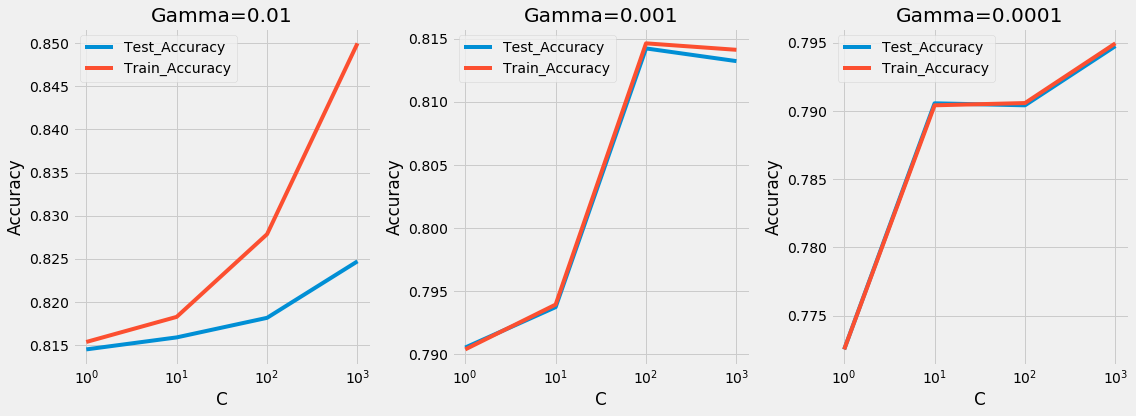

In [46]:
# Plotting 'C' versus train and test scores

grid_cv_results['param_C'] = grid_cv_results['param_C'].astype('int')

plt.figure(figsize=(16,6))

plt.subplot(131)
gamma_01 = grid_cv_results[grid_cv_results['param_gamma'] == 0.01]
plt.plot(gamma_01['param_C'], gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'], gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.01')
plt.legend(['Test_Accuracy', 'Train_Accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = grid_cv_results[grid_cv_results['param_gamma'] == 0.001]
plt.plot(gamma_001['param_C'], gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'], gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.001')
plt.legend(['Test_Accuracy', 'Train_Accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = grid_cv_results[grid_cv_results['param_gamma'] == 0.0001]
plt.plot(gamma_0001['param_C'], gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'], gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.0001')
plt.legend(['Test_Accuracy', 'Train_Accuracy'], loc='upper left')
plt.xscale('log')

plt.tight_layout()
plt.show();

### Best params according to the `GridSearchCV` model

In [45]:
best_score = grid_cv.best_score_
best_hyperparams = grid_cv.best_params_

print(f'The best test score is {best_score} corresponding to hyperparameters {best_hyperparams}')

The best test score is 0.8247065582624726 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


## Using above plotted parameters

In [49]:
%%time
# Specify optimal hyperparameters
params = {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
# Instantiate the model with the best 'C'

svc = SVC(C=1000, gamma=0.01, kernel='rbf')

# Fit the model to train data set

svc.fit(X_train_scaled, y_train)


# Predicting the test data set

y_pred = svc.predict(X_test_scaled)

Wall time: 39min 53s


In [50]:
# Print metrics

# Confusion Matrix
print(confusion_matrix(y_test, y_pred), '\n')

# Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Precision
print(f'Precision: {precision_score(y_test, y_pred)}')

# Recall
print(f'Recall: {recall_score(y_test, y_pred)}')

[[17365   729]
 [ 3287  2027]] 

Accuracy: 0.8284347231715653
Precision: 0.7354862119013063
Recall: 0.38144523899134364


- ***Observations:***
- **Using params = {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}**
- `Accuracy = 0.83`, `Precision = 0.74` and `Recall = 0.38`
- Time taken to run the model is `39 mins and 53 secs`
- Accuracy and Precision looks good, however Recall looks bad

In [51]:
%%time
# Specify optimal hyperparameters
params = {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
# Instantiate the model with the best 'C'

svc = SVC(C=100, gamma=0.001, kernel='rbf')

# Fit the model to train data set

svc.fit(X_train_scaled, y_train)


# Predicting the test data set

y_pred = svc.predict(X_test_scaled)

Wall time: 15min 56s


In [52]:
# Print metrics

# Confusion Matrix
print(confusion_matrix(y_test, y_pred), '\n')

# Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Precision
print(f'Precision: {precision_score(y_test, y_pred)}')

# Recall
print(f'Recall: {recall_score(y_test, y_pred)}')

[[17509   585]
 [ 3789  1525]] 

Accuracy: 0.8131408065618592
Precision: 0.7227488151658767
Recall: 0.28697779450508093


- ***Observations:***
- **Using params = {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}**
- `Accuracy = 0.81`, `Precision = 0.72` and `Recall = 0.29`
- Time taken to run the model is `15 mins and 56 secs`
- Accuracy and Precision looks good, however Recall looks bad

In [53]:
%%time
# Specify optimal hyperparameters
best_params = {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
# Instantiate the model with the best 'C'

svc = SVC(C=1000, gamma=0.0001, kernel='rbf')

# Fit the model to train data set

svc.fit(X_train_scaled, y_train)


# Predicting the test data set

y_pred = svc.predict(X_test_scaled)

Wall time: 10min 43s


In [54]:
# Print metrics

# Confusion Matrix
print(confusion_matrix(y_test, y_pred), '\n')

# Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Precision
print(f'Precision: {precision_score(y_test, y_pred)}')

# Recall
print(f'Recall: {recall_score(y_test, y_pred)}')

[[17471   623]
 [ 3919  1395]] 

Accuracy: 0.8059637730690362
Precision: 0.6912784935579782
Recall: 0.2625141136620248


- ***Observations:***
- **Using params = {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}**
- `Accuracy = 0.81`, `Precision = 0.69` and `Recall = 0.26`
- Time taken to run the model is `10 mins and 43 secs`
- Accuracy looks better, Precision looks good, however Recall looks bad

### Conclusion for `SVMs`
- SVMs with `linear` kernel are performing very poorly in terms of `Recall` and `Precision`
- SVMs with `RBF` kernel are also performing poorly in terms of `Recall` and `Precision` however, they are better than linear kernel
- if we want good Accuracy on Test data then, **params = {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}** seems good with **Accuracy** of **0.83**
- if we want good Precision on Test data then, **params = {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}** seems good with **Precision** of **0.74**
- if we want good Recall on Test data then, **params = {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}** seems good with **Recall** of **0.38**
- Of all the parameters used, **params = {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}** gives better results

## 5(A). Clustering with `K-Means`

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
X.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Opportunity Sizing,ERP Implementation,Legacy Modernization,Technical Business Solutions,Bengaluru,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Enterprise Sellers,Marketing,Partners,Tele Sales,Known,Unknown
0,76,13,0,4.0,4.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,63,2,0,2.0,4.0,0.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,24,7,7750,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,16,5,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4,69,11,32886,0.0,0.0,0.0,3.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [26]:
X.shape

(78025, 22)

In [27]:
# Selected only 3 features as they are the only as it will be easy for grouping the data points on those features
# Also it is taking lot of time to run with all features

features = ['Sales Velocity', 'Sales Stage Iterations', 'Opportunity Size (USD)']

In [28]:
# Assigning a copy of subset of 'X' to X_subset

X_subset = X[features].copy()

In [29]:
# Checking for outliers, central tendency and variance of numerical columns in the data

X_subset.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.99])

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
count,78025.000000,78025.000000,78025.000000
mean,43.595348,2.955732,30085.664992
std,26.585600,1.497242,21169.932617
min,0.000000,1.000000,0.000000
25%,19.000000,2.000000,13816.000000
50%,43.000000,3.000000,29845.000000
75%,65.000000,3.000000,43185.000000
95%,88.000000,6.000000,56424.800000
99%,91.000000,8.000000,118818.120000
max,210.000000,23.000000,149981.000000


- ***Observations:***
- **Sales Velocity**
- Mean and Median look similar
- Standard deviation is more than 10% of the max value, it means there is spread in the data points
- There is huge difference between 99 percentile and 100 percentile, it means there are outliers
- **Sales Stage Iterations**
- Mean and Median look similar
- Standard deviation is less than 10% of the max value, it means there is less spread in the data points
- There is huge difference between 99 percentile and 100 percentile, it means there are outliers
- **Opportunity Size (USD)**
- Mean and Median look similar
- Standard deviation is more than 10% of the max value, it means there is spread in the data points
- There is difference between 99 percentile and 100 percentile, it means there are outliers

### Checking for Outliers

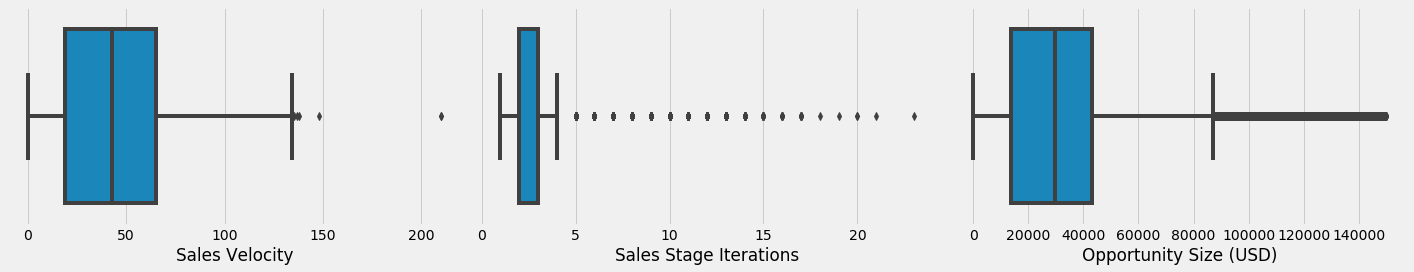

In [103]:
plt.figure(figsize=(20,4))
features = ['Sales Velocity', 'Sales Stage Iterations', 'Opportunity Size (USD)']

for i in enumerate(features):
    plt.subplot(1,3,i[0]+1)
    sb.boxplot(X_subset[i[1]])

plt.tight_layout()
plt.show();

- **IQR and whiskers:**
    - **IQR -**
        Q1 = 25 percentile, Q2 = 50 percentile, Q3 = 75 percentile, IQR = Q3 - Q2
        Commonly used metric for outlier detection is IQR 1.5 rule.
        The IOR 1.5 rule is that data point less than lower limit i.e (Q1 - (IQR\*1.5)) and
        more than upper limit i.e ( Q3 + (IQR\*1.5)) are considered to be an outlier
    - **Whiskers -**
        lower limit and upper limit are called lower whisker and upper whisker respectively

- **For comparison of boxplots figures, used describe function mentioned above**
<br>

- ***Observations:***
- **Sales Velocity**
    - The plot is right skewed
    - 50% data lies between 19 days and 65 days i.e. Q1 and Q3
    - Between Q1 and Q3, spread of data points above and below median value is similar
    - 99% of data points have days spent in sales stage of 91 days or below
    - There are outliers above upper whisker, outliers look genuine as sometimes lot of time is spend at sales stage
- **Sales Stage Iterations**
    - It seems the plot is right skewed
    - 50% data lies between 2 times and 3 times i.e. Q1 and Q3
    - 99% of data points have - number of times the status of an opportunity changes - of 8 times or below, 8 times is also high number
    - There are lot of outliers above upper whiskers, outliers look genuine as some customers have fluctuationg mind, so it takes time for them to take decisions
- **Opportunity Size (USD)**
    - The plot is right skewed
    - 50% data lies between 13816 USD and 43185 USD i.e. Q1 and Q3
    - Between Q1 and Q3, data points below median value have a bit wider spread within IQR
    - 50% of data points have Potential revenue from the opportunity of 29845 USD or below
    - There are lot of outliers above upper whiskers, outliers look genuine as potential revenue from some customers maybe high

### Outliers Treatment

In [30]:
# Performed 99 percentile capping on the below mentioned variables as an outlier treatment

X_subset.loc[X_subset['Sales Velocity']>float((X_subset['Sales Velocity'].quantile([0.99]))), 'Sales Velocity'] = float((X_subset['Sales Velocity'].quantile([0.99])))
X_subset.loc[X_subset['Sales Stage Iterations']>float((X_subset['Sales Stage Iterations'].quantile([0.99]))), 'Sales Stage Iterations'] = float((X_subset['Sales Stage Iterations'].quantile([0.99])))
X_subset.loc[X_subset['Opportunity Size (USD)']>float((X_subset['Opportunity Size (USD)'].quantile([0.99]))), 'Opportunity Size (USD)'] = float((X_subset['Opportunity Size (USD)'].quantile([0.99])))


- Chose 99 percentile as capping value

In [105]:
# Checking describe after modification

X_subset.describe()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
count,78025.000000,78025.000000,78025.000000
mean,43.526575,2.931868,29926.129801
std,26.429901,1.380144,20407.932682
min,0.000000,1.000000,0.000000
25%,19.000000,2.000000,13816.000000
50%,43.000000,3.000000,29845.000000
75%,65.000000,3.000000,43185.000000
max,91.000000,8.000000,118818.120000


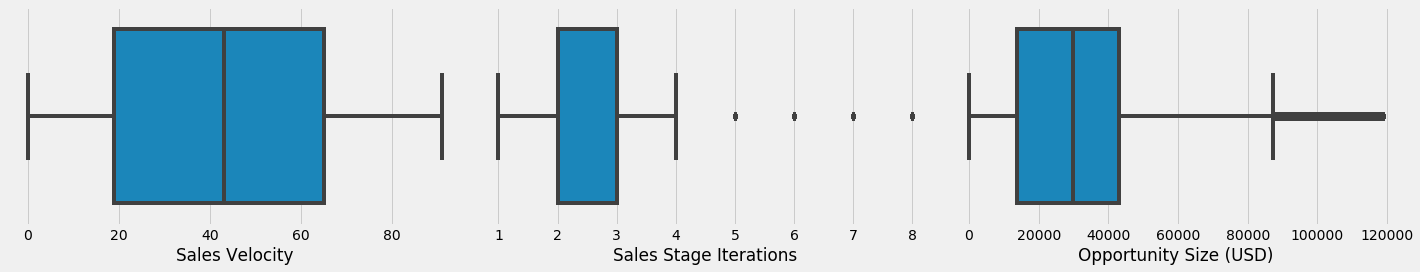

In [106]:
plt.figure(figsize=(20,4))
features = ['Sales Velocity', 'Sales Stage Iterations', 'Opportunity Size (USD)']

for i in enumerate(features):
    plt.subplot(1,3,i[0]+1)
    sb.boxplot(X_subset[i[1]])

plt.tight_layout()
plt.show();

- ***Observations:***
- Even after capping the data points to 99 percentile we can see outliers in 'Sales Stage Iterations' and 'Opportunity Size (USD)'
- However there are no outliers in 'Sales Velocity' after capping

In [31]:
# Assigning a copy of 'X_subset' to X_scaled

X_scaled = X_subset.copy()

### Performing Hopkins test

In [60]:
# Hopkins Statistic Code

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [68]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter by taking average of 10 scores
hopkin_list=[]
for i in range(10):
    hopkin_list.append(hopkins(X_subset))
print(np.mean(hopkin_list))

0.936430637586877


- ***Hopkins test is performed to evaluate whether the data sets contains meaningful clusters (i.e.: non-random structures) or not. If yes, then how many clusters are there. This process is defined as the assessing of clustering tendency or the feasibility of the clustering analysis***
<br>

- ***Observations:***
- Performed hopkins test to check whether we can perform clustering on those 3 variables
- For hopkins score performed for loop for 10 times and took average of them
- Always recommended to run hopkins test for 8-10 times as the score changes every time
- Average hopkins score of 0.93 means we can perform clustering
- For a particular dataset, if hopkins score is above 0.60 then, we can be perform clustering on that dataset

### Performing Standard Scaling

In [110]:
X_scaled.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
0,76.0,8.0,0.0
1,63.0,2.0,0.0
2,24.0,7.0,7750.0
3,16.0,5.0,0.0
4,69.0,8.0,32886.0


In [32]:
# Performing feature scaling

sc = StandardScaler()
X_scaled[features] = sc.fit_transform(X_scaled[features])

In [33]:
# Checking 'X_scaled' after scaling

X_scaled.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
0,1.228670,3.672201,-1.466406
1,0.736800,-0.675201,-1.466406
2,-0.738811,2.947634,-1.086650
3,-1.041500,1.498500,-1.466406
4,0.963817,3.672201,0.145036


### Finding the optimum number of Clusters

- **Elbow Method**

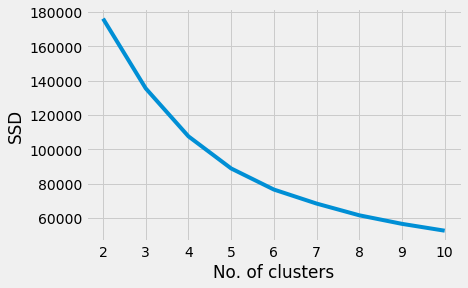

In [77]:
range_clusters = [2,3,4,5,6,7,8,9,10]
ssd = []

for cluster in range_clusters:
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

# plot the SSDs for each number of clusters

sb.lineplot(x=range_clusters,y=ssd)
plt.xticks(ticks=np.arange(2,11))
plt.xlabel('No. of clusters')
plt.ylabel('SSD')
plt.show();

- ***Observations:***
- It looks like `3, 4, 5` clusters will be apropriate for clustering purpose
- Will be using all `3, 4, 5` clusters and check which fits well by looking at the visualization for those clusters

- **Silhouette Score**

In [78]:
range_clusters = [2,3,4,5,6,7,8,9,10]

for cluster in range_clusters:
    
    # initialize kmeans
    kmeans = KMeans(n_clusters=cluster)
    km = kmeans.fit(X_scaled)
    cluster_labels = km.labels_
    
    # silhouette score
    sil_score = silhouette_score(X_scaled,cluster_labels)
    print(f'For clusters={cluster}, the silhouette score is {sil_score}')

For clusters=2, the silhouette score is 0.2759620611497537
For clusters=3, the silhouette score is 0.3076837526334715
For clusters=4, the silhouette score is 0.29507434558243467
For clusters=5, the silhouette score is 0.3055328234059996
For clusters=6, the silhouette score is 0.29280706423077824
For clusters=7, the silhouette score is 0.29651712105897715
For clusters=8, the silhouette score is 0.3031035325142548
For clusters=9, the silhouette score is 0.2933065087077506
For clusters=10, the silhouette score is 0.29814399431149685


- ***Observations:***
- Here according to silhouette score, `3 and 5` clusters will be apropriate for clustering purpose
- Still we will be using only `3 and 4` clusters and check which fits well by looking at the visualization for those clusters

### K-Means with 3 clusters

In [34]:
# KMeans with some arbitrary 'K=3'

kmeans_3 = KMeans(n_clusters=3, random_state=23)
kmeans_3.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

In [35]:
kmeans_3.labels_

array([2, 0, 2, ..., 1, 1, 1])

In [36]:
# Creating a copy of country dataframe to use for kmeans
X_kmeans_3 = X_subset.copy()

In [37]:
X_kmeans_3.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
0,76.0,8.0,0.0
1,63.0,2.0,0.0
2,24.0,7.0,7750.0
3,16.0,5.0,0.0
4,69.0,8.0,32886.0


In [38]:
# Adding 'Cluster_Num' column to the X_kmeans_3 dataframe
X_kmeans_3['Cluster_labels'] = kmeans_3.labels_
X_kmeans_3.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Cluster_labels
0,76.0,8.0,0.0,2
1,63.0,2.0,0.0,0
2,24.0,7.0,7750.0,2
3,16.0,5.0,0.0,2
4,69.0,8.0,32886.0,2


In [39]:
# Checking value counts after creating Cluster_Num column
X_kmeans_3.Cluster_labels.value_counts()

1    36707
0    29237
2    12081
Name: Cluster_labels, dtype: int64

## 5(B1). Model Evaluation

### Cluster Profiling with respect to K-Means clustering with 3 clusters

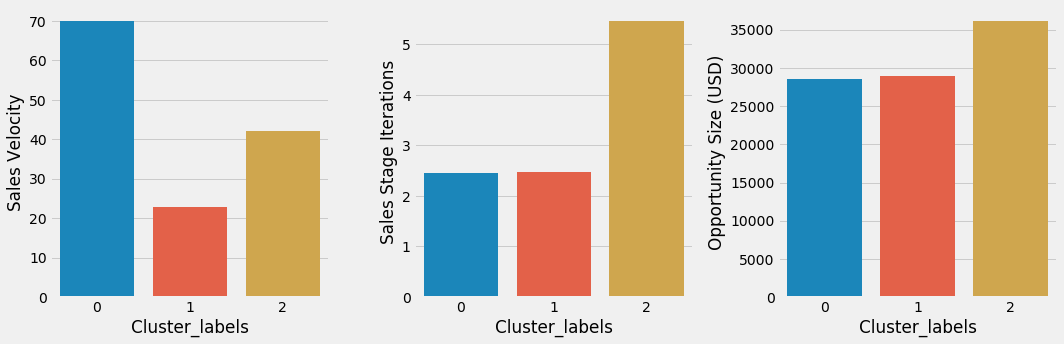

In [58]:
# Cluster Profiling
# plotting barplots

plt.figure(figsize=(15,5))
plt.subplot(131)
sb.barplot(x='Cluster_labels',y='Sales Velocity',data=X_kmeans_3, ci=None)

plt.subplot(132)
sb.barplot(x='Cluster_labels',y='Sales Stage Iterations',data=X_kmeans_3, ci=None)

plt.subplot(133)
sb.barplot(x='Cluster_labels',y='Opportunity Size (USD)',data=X_kmeans_3, ci=None)

plt.tight_layout()
plt.show();

- ***Observations:***
- In the above barplots the observations are for 3 clusters
-  **`cluster 0`**
- It has very high ***'Sales Velocity'*** i.e. number of days spent in sales stage when compared to other two clusters
- It has low ***'Sales Stage Iterations'*** i.e. number of times the status of an opportunity changed when compared to `cluster 2`, it seems 'Sales Stage Iterations' is same for `cluster 0` and `cluster 1`
- It has low ***'Opportunity Size (USD)'*** i.e. potential revenue from the opportunity when compared to `cluster 2`, it is also a bit less when compared to `cluster 1`
- It means that lot of time was spent at the sales stage, though status of opportunity was changed less times, the revenue from this cluster was also less when compared to other two clusters
- **`cluster 1`**
- It has low ***'Sales Velocity'*** i.e. number of days spent in sales stage when compared to other two clusters
- It has low ***'Sales Stage Iterations'*** i.e. number of times the status of an opportunity changed when compared to `cluster 2`, it seems 'Sales Stage Iterations' is same for `cluster 1` and `cluster 0`
- It has low ***'Opportunity Size (USD)'*** i.e. potential revenue from the opportunity when compared to `cluster 2`, it is also a bit more than `cluster 0`
- It means that less time was spent at the sales stage, though status of opportunity was changed less times, the revenue from this cluster was also less compared when to `cluster 2` but more than `cluster 0`.
- **`cluster 2`**
- It has medium ***'Sales Velocity'*** i.e. number of days spent in sales stage
- It has high ***'Sales Stage Iterations'*** i.e. number of times the status of an opportunity changed when compared to other two clusters
- It has more ***'Opportunity Size (USD)'*** i.e. potential revenue from the opportunity when compared to other two clusters
- It means that less time was spent at the sales stage when compared to `cluster 0` and more time was spent when compared to `cluster 1`, though number of times the status of opportunity was changed was high, the revenue from this cluster was also high

### K-Means with 4 clusters

In [42]:
# KMeans with some arbitrary 'K=4'

kmeans_4 = KMeans(n_clusters=4, random_state=23)
kmeans_4.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

In [43]:
kmeans_4.labels_

array([3, 2, 3, ..., 1, 1, 1])

In [44]:
# Creating a copy of country dataframe to use for kmeans
X_kmeans_4 = X_subset.copy()

In [45]:
X_kmeans_4.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
0,76.0,8.0,0.0
1,63.0,2.0,0.0
2,24.0,7.0,7750.0
3,16.0,5.0,0.0
4,69.0,8.0,32886.0


In [46]:
# Adding 'Cluster_Num' column to the country_kmeans dataframe
X_kmeans_4['Cluster_labels'] = kmeans_4.labels_
X_kmeans_4.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Cluster_labels
0,76.0,8.0,0.0,3
1,63.0,2.0,0.0,2
2,24.0,7.0,7750.0,3
3,16.0,5.0,0.0,3
4,69.0,8.0,32886.0,3


In [47]:
# Checking value counts after creating Cluster_Num column
X_kmeans_4.Cluster_labels.value_counts()

2    25334
0    22729
1    20894
3     9068
Name: Cluster_labels, dtype: int64

## 5(B2). Model Evaluation

### Cluster Profiling with respect to K-Means clustering with 4 clusters

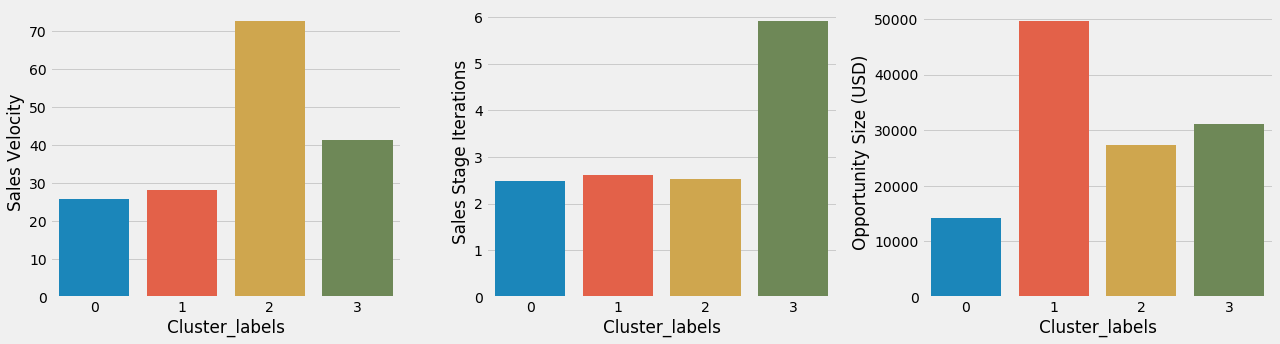

In [57]:
# Cluster Profiling
# plotting barplots

plt.figure(figsize=(18,5))
plt.subplot(131)
sb.barplot(x='Cluster_labels',y='Sales Velocity',data=X_kmeans_4, ci=None)

plt.subplot(132)
sb.barplot(x='Cluster_labels',y='Sales Stage Iterations',data=X_kmeans_4, ci=None)

plt.subplot(133)
sb.barplot(x='Cluster_labels',y='Opportunity Size (USD)',data=X_kmeans_4, ci=None)

plt.tight_layout()
plt.show();

- ***Observations:***
- In the above barplots the observations are for 4 clusters
-  **`cluster 0`**
- It has low ***'Sales Velocity'*** i.e. number of days spent in sales stage when compared to other three clusters
- It has low ***'Sales Stage Iterations'*** i.e. number of times the status of an opportunity changed when compared to `cluster 1` and `cluster 3`, it seems 'Sales Stage Iterations' is same for `cluster 0` and `cluster 2`
- It has low ***'Opportunity Size (USD)'*** i.e. potential revenue from the opportunity when compared to other three clusters
- Even though, less time was spent at the sales stage, status of opportunity was changed less number of times, the revenue from this cluster was also very less when compared to other three clusters
- **`cluster 1`**
- It has low ***'Sales Velocity'*** i.e. number of days spent in sales stage when compared to `cluster 2` and `cluster 3`, but it is higher than `cluster 0`
- It has low ***'Sales Stage Iterations'*** i.e. number of times the status of an opportunity changed when compared to `cluster 3`, but it is more than `cluster 0` and `cluster 2`
- It has high ***'Opportunity Size (USD)'*** i.e. potential revenue from the opportunity when compared to other three clusters
- Even though, less time was spent at the sales stage, the status of opportunity was changed less number of times and the revenue from this cluster was very high when compared to other three clusters
- **`cluster 2`**
- It has high ***'Sales Velocity'*** i.e. number of days spent in sales stage when compared to other three clusters
- It has low ***'Sales Stage Iterations'*** i.e. number of times the status of an opportunity changed when compared to `cluster 1` and `cluster 3`, it seems 'Sales Stage Iterations' is same for `cluster 2` and `cluster 0`
- It has more ***'Opportunity Size (USD)'*** i.e. potential revenue from the opportunity when compared to `cluster 0`, but less when compared to `cluster 1` and `cluster 3`
- Even though, more time was spent at the sales stage when compared to other three clusters, number of times the status of opportunity was changed was low, the revenue from this cluster was less than `cluster 1` and `cluster 3`
- **`cluster 3`**
- It has high ***'Sales Velocity'*** i.e. number of days spent in sales stage when compared to `cluster 0` and `cluster 1`, but low when compared to `cluster 2`
- It has high ***'Sales Stage Iterations'*** i.e. number of times the status of an opportunity changed when compared to other three clusters
- It has more ***'Opportunity Size (USD)'*** i.e. potential revenue from the opportunity when compared to `cluster 0` and `cluster 2`, but less when compared to `cluster 1`
- Even though, more time was spent at the sales stage when compared to `cluster 0` and `cluster 1`, the number of times the status of opportunity was changed was very high, also, the revenue from this cluster was lesser than `cluster 1`

### Conclusions for K-Means Clustering
- Number of clusters required depends upon the business requirements and domain knowledge
- We can use `elbow` method and `silhouette` score as a reference
- 3 number of clusters seems to be appropriate for this dataset. However, also used 4 clusters for analysis purpose
- **Note:** If some or all of cluster numbers have same silhouette score, it is always better to choose less number of clusters

## 6(A). Building model with `XGBoost Classifier`

In [149]:
# Importing relevant libraries

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [27]:
# Checking the distribution of '0' and '1' for train data

print(round(y_train[y_train == 0].shape[0]/len(y_train.index), 2))
print(round(y_train[y_train == 1].shape[0]/len(y_train.index), 2))

0.77
0.23


In [28]:
# Checking the distribution of '0' and '1' for test data

print(round(y_test[y_test == 0].shape[0]/len(y_test.index), 2))
print(round(y_test[y_test == 1].shape[0]/len(y_test.index), 2))

0.77
0.23


- ***Observations:***
- Proportion of '0' and '1' before the train and test split is 0.77 and 0.23 respectively
- Proportion of '0' and '1' in both train and test data is equal

In [150]:
# Initiating and fitting the classifier with default parameters

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Using model on Train Dataset

In [159]:
confusion_matrix(y_train,xgb.predict(X_train))

array([[40721,  1557],
       [ 6706,  5633]], dtype=int64)

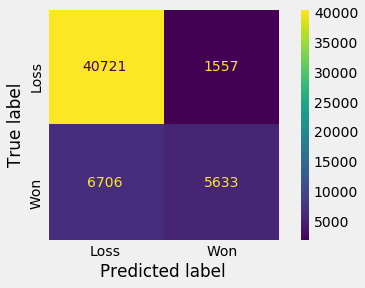

In [160]:
plot_confusion_matrix(xgb, X_train, y_train, values_format='d', cmap='viridis')
plt.xticks(ticks=[0,1], labels=['Loss', 'Won'])
plt.yticks(ticks=[0,1], labels=['Loss', 'Won'],rotation=90)
plt.grid([])
plt.show();

In [151]:
# Checking AUC on train data

print('AUC on train data by XGBoost =', roc_auc_score(y_train, xgb.predict(X_train)))

AUC on train data by XGBoost = 0.7098461564006805


In [152]:
# Checking Accuracy on train data

print('Accuracy on train data by XGBoost =', accuracy_score(y_train, xgb.predict(X_train)))

Accuracy on train data by XGBoost = 0.8487101085742534


In [153]:
# Checking Sensitivity on train data

print('Recall(Sensitivity) on train data by XGBoost =', recall_score(y_train, xgb.predict(X_train)))

Recall(Sensitivity) on train data by XGBoost = 0.4565199773077235


In [154]:
# Checking Precision on train data

print('Precision on train data by XGBoost =', precision_score(y_train, xgb.predict(X_train)))

Precision on train data by XGBoost = 0.7834492350486787


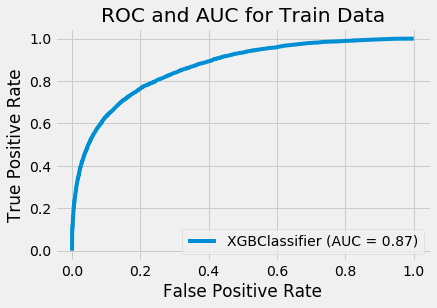

In [161]:
# Plotting Receiver Operating Characteristic(ROC) Curve and Area Under Curve(AUC) for train data

plot_roc_curve(xgb, X_train, y_train, drop_intermediate=False)
plt.title('ROC and AUC for Train Data')
plt.show();

### Using model on Test Dataset

In [162]:
confusion_matrix(y_test, y_pred=xgb.predict(X_test))

array([[17435,   685],
       [ 2936,  2352]], dtype=int64)

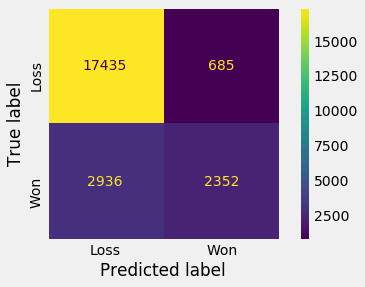

In [163]:
plot_confusion_matrix(xgb, X_test, y_test, values_format='d', cmap='viridis')
plt.xticks(ticks=[0,1], labels=['Loss', 'Won'])
plt.yticks(ticks=[0,1], labels=['Loss', 'Won'],rotation=90)
plt.grid([])
plt.show();

In [155]:
# Checking AUC on test data

print('AUC on test data by XGBoost =', roc_auc_score(y_test, xgb.predict(X_test)))

AUC on test data by XGBoost = 0.7034885516960389


In [156]:
# Checking Accuracy on test data

print('Accuracy on test data by XGBoost =', accuracy_score(y_test, xgb.predict(X_test)))

Accuracy on test data by XGBoost = 0.8453092959671907


In [157]:
# Checking Sensitivity on test data

print('Recall(Sensitivity) on test data by XGBoost =', recall_score(y_test, xgb.predict(X_test)))

Recall(Sensitivity) on test data by XGBoost = 0.44478063540090773


In [158]:
# Checking Precision on test data

print('Precision on test data by XGBoost =', precision_score(y_test, xgb_class.predict(X_test)))

Precision on test data by XGBoost = 0.7582722909825713


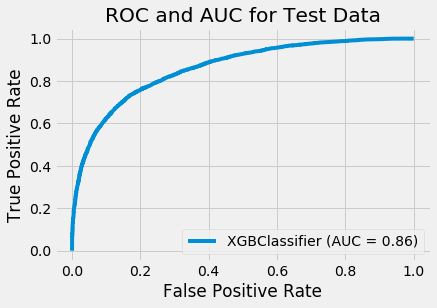

In [164]:
# Plotting Receiver Operating Characteristic(ROC) Curve and Area Under Curve(AUC) for test data

plot_roc_curve(xgb, X_test, y_test, drop_intermediate=False)
plt.title('ROC and AUC for Test Data')
plt.show();

## Hyper-Parameter tuning using 'GridSearchCV'

In [29]:
len(X_train.index)

54617

In [32]:
np.sqrt(len(X_train.index))
np.sqrt(np.sqrt(len(X_train.index)))
np.sqrt(np.sqrt(np.sqrt(len(X_train.index))))

233.70280272174745

15.287341257450475

3.9099029728946566

In [26]:
%%time
# Hyper parameters tunning

xgb_class = XGBClassifier()

param = {'learning_rate': [0.1,0.2,0.3,0.4,0.5],
        'max_depth':[3,15,50,75,100],
        'min_child_weight':[50,100,300,500],
        'n_estimators':[50,100,200,300]}

scorer = make_scorer(roc_auc_score,
                    greater_is_better=True,
                    needs_proba=True,
                    needs_threshold=False)

clf_xgb = GridSearchCV(estimator=xgb_class,
                      param_grid=param,
                      n_jobs=-1,
                      cv=3,
                      scoring=scorer, verbose=1,
                      refit=True)

clf_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 67.4min finished


Wall time: 1h 8min 19s


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...ght=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [3, 15, 50, 75, 100],
                         'min_child_weight': [50, 10

In [27]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 50, 'n_estimators': 300}
0.8864543621944426
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=50, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


- ***Observations:***
- Due to memory and speed constraints, could only use limited candidates in each parameter

## 6(B). Model Evaluation

In [28]:
# Initiating and fitting the classifier with default parameters

xgb_class = XGBClassifier(learning_rate=0.1, 
                          max_depth=15, 
                          min_child_weight=50, 
                          n_estimators=300)

xgb_class.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=50, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Using model on Train Dataset

In [42]:
confusion_matrix(y_train,xgb_class.predict(X_train))

array([[40563,  1715],
       [ 4678,  7661]], dtype=int64)

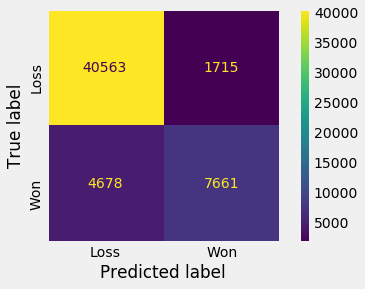

In [58]:
plot_confusion_matrix(xgb_class, X_train, y_train, values_format='d', cmap='viridis')
plt.xticks(ticks=[0,1], labels=['Loss', 'Won'])
plt.yticks(ticks=[0,1], labels=['Loss', 'Won'],rotation=90)
plt.grid([])
plt.show();

In [40]:
# Checking AUC on train data

print('AUC on train data by XGBoost =', roc_auc_score(y_train, xgb_class.predict(X_train)))

AUC on train data by XGBoost = 0.790156030813162


In [30]:
# Checking Accuracy on train data

print('Accuracy on train data by XGBoost =', accuracy_score(y_train, xgb_class.predict(X_train)))

Accuracy on train data by XGBoost = 0.8829485325081934


In [31]:
# Checking Sensitivity on train data

print('Recall(Sensitivity) on train data by XGBoost =', recall_score(y_train, xgb_class.predict(X_train)))

Recall(Sensitivity) on train data by XGBoost = 0.6208768943998704


In [35]:
# Checking Precision on train data

print('Precision on train data by XGBoost =', precision_score(y_train, xgb_class.predict(X_train)))

Precision on train data by XGBoost = 0.8170861774744027


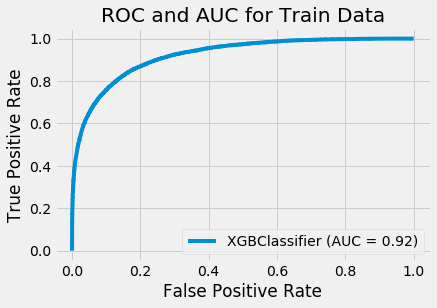

In [60]:
# Plotting Receiver Operating Characteristic(ROC) Curve and Area Under Curve(AUC) for train data

plot_roc_curve(xgb_class, X_train, y_train, drop_intermediate=False)
plt.title('ROC and AUC for Train Data')
plt.show();

### Using model on Test Dataset

In [49]:
confusion_matrix(y_test, y_pred=xgb_class.predict(X_test))

array([[17163,   957],
       [ 2286,  3002]], dtype=int64)

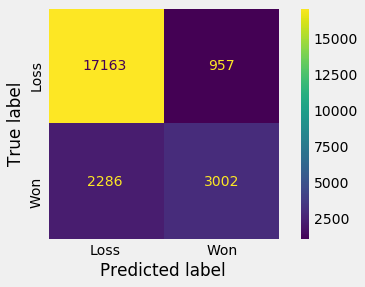

In [59]:
plot_confusion_matrix(xgb_class, X_test, y_test, values_format='d', cmap='viridis')
plt.xticks(ticks=[0,1], labels=['Loss', 'Won'])
plt.yticks(ticks=[0,1], labels=['Loss', 'Won'],rotation=90)
plt.grid([])
plt.show();

In [32]:
# Checking AUC on test data

print('AUC on test data by XGBoost =', roc_auc_score(y_test, xgb_class.predict(X_test)))

AUC on test data by XGBoost = 0.7574429421606836


In [33]:
# Checking Accuracy on test data

print('Accuracy on test data by XGBoost =', accuracy_score(y_test, xgb_class.predict(X_test)))

Accuracy on test data by XGBoost = 0.8614576213260424


In [34]:
# Checking Sensitivity on test data

print('Recall(Sensitivity) on test data by XGBoost =', recall_score(y_test, xgb_class.predict(X_test)))

Recall(Sensitivity) on test data by XGBoost = 0.5677004538577912


In [37]:
# Checking Precision on test data

print('Precision on test data by XGBoost =', precision_score(y_test, xgb_class.predict(X_test)))

Precision on test data by XGBoost = 0.7582722909825713


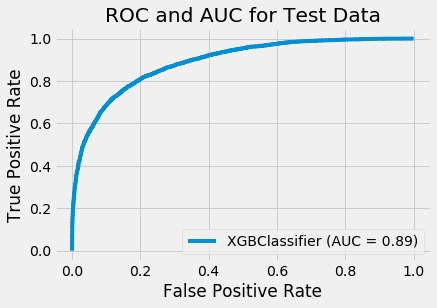

In [65]:
# Plotting Receiver Operating Characteristic(ROC) Curve and Area Under Curve(AUC) for test data

plot_roc_curve(xgb_class, X_test, y_test, drop_intermediate=False)
plt.title('ROC and AUC for Test Data')
plt.show();

In [66]:
# Creating dataframe of important features

feat_imp = pd.DataFrame({'Features': X_train.columns, 'Importance':xgb_class.feature_importances_})

# Sorting and displaying the imp features dataframe

feat_imp = feat_imp.sort_values(by='Importance',ascending=False)
feat_imp.head()

,Features,Importance
5,Business from Client Last Year,0.545210
1,Sales Stage Iterations,0.082417
16,Enterprise Sellers,0.056533
14,Kolkata,0.041797
0,Sales Velocity,0.032430


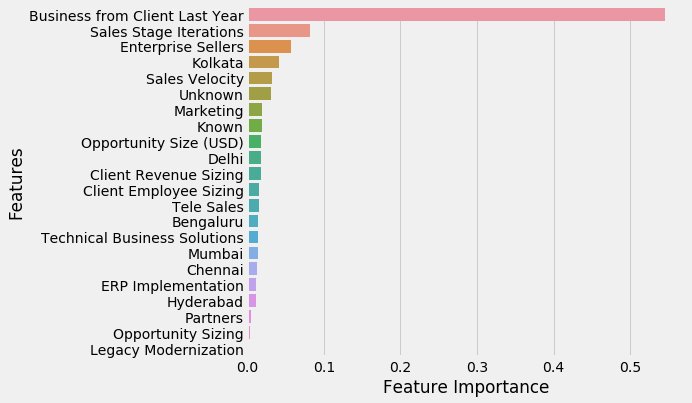

In [67]:
# Plotting feature importance

plt.figure(figsize=(7,6))
sb.barplot(feat_imp.Importance, feat_imp.Features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show();

### Conclusion for `XGBoost`
- XGBoost with `Default` parameters i.e. using **params = {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}** is performing fairly okay on test dataset, it has `Accuracy = 0.85`, `Precision = 0.76` and `Recall = 0.44` and `AUC = 0.86`
- XGBoost with `GridSerachCV` parameters i.e. using **params = {'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 50, 'n_estimators': 300}** is performing somewhat better on test dataset, it has `Accuracy = 0.86`, `Precision = 0.76` and `Recall = 0.57` and `AUC = 0.89`
- Using `GridSearchCV` top 5 important features are **{'Business from Client Last Year':0.55,'Sales Stage Iterations':0.08,'Enterprise Sellers':0.06, 'Kolkata':0.04,'Sales Velocity':0.03,}**
- Time taken to run the GridSearchCV is `1 hr 8 mins and 19 secs`
- Accuracy looks better, Precision looks same, Recall looks better using optimal parameters which were chosen after performing GridSearchCV
- Due to memory and speed constraints, could only use limited candidates in each parameter otherwise results could have been better

## 7(A). Building model using `Artificial Neural Network (ANN)`

In [99]:
# Importing relevant libraries

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((54617, 22), (23408, 22), (54617,), (23408,))

In [184]:
# Initializing the ANN

classifier = tf.keras.models.Sequential()

In [185]:
# Adding the input layer and first hidden layer

classifier.add(tf.keras.Input(shape=(22,)))
classifier.add(tf.keras.layers.Dense(units=32,
                                     activation='relu',
                                     kernel_initializer='glorot_uniform'))

In [186]:
# Adding the second hidden layer

classifier.add(tf.keras.layers.Dense(units=32,
                                     activation='relu',
                                     kernel_initializer='glorot_uniform'))

In [187]:
# Adding the third hidden layer

classifier.add(tf.keras.layers.Dense(units=64,
                                     activation='relu',
                                     kernel_initializer='glorot_uniform'))

In [188]:
# Adding the output layer

classifier.add(tf.keras.layers.Dense(units=1,
                                     activation='sigmoid',
                                     kernel_initializer='glorot_uniform'))

In [189]:
classifier.output_shape

(None, 1)

In [190]:
# Compiling the ANN

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [191]:
%%time
# Fitting the ANN to training set

classifier.fit(X_train_scaled.values, y_train.values, batch_size=128, epochs=200)

Train on 54617 samples
Epoch 1/200
54617/54617 [==============================] - 4s 75us/sample - loss: 0.4642 - accuracy: 0.7920
Epoch 2/200
54617/54617 [==============================] - 2s 40us/sample - loss: 0.4317 - accuracy: 0.8121
Epoch 3/200
54617/54617 [==============================] - 2s 41us/sample - loss: 0.4193 - accuracy: 0.8187
Epoch 4/200
54617/54617 [==============================] - 2s 46us/sample - loss: 0.4104 - accuracy: 0.8250
Epoch 5/200
54617/54617 [==============================] - 2s 39us/sample - loss: 0.4032 - accuracy: 0.8287
Epoch 6/200
54617/54617 [==============================] - 3s 52us/sample - loss: 0.3986 - accuracy: 0.8310
Epoch 7/200
54617/54617 [==============================] - 2s 43us/sample - loss: 0.3951 - accuracy: 0.8322
Epoch 8/200
54617/54617 [==============================] - 3s 50us/sample - loss: 0.3928 - accuracy: 0.8326
Epoch 9/200
54617/54617 [==============================] - 2s 45us/sample - loss: 0.3908 - accuracy: 0.8339
Epoch

54617/54617 [==============================] - 2s 43us/sample - loss: 0.3303 - accuracy: 0.8611
Epoch 150/200
54617/54617 [==============================] - 2s 39us/sample - loss: 0.3304 - accuracy: 0.8611
Epoch 151/200
54617/54617 [==============================] - 2s 45us/sample - loss: 0.3302 - accuracy: 0.8610
Epoch 152/200
54617/54617 [==============================] - 2s 33us/sample - loss: 0.3297 - accuracy: 0.8617
Epoch 153/200
54617/54617 [==============================] - 2s 28us/sample - loss: 0.3303 - accuracy: 0.8606
Epoch 154/200
54617/54617 [==============================] - 2s 35us/sample - loss: 0.3302 - accuracy: 0.8607
Epoch 155/200
54617/54617 [==============================] - 2s 40us/sample - loss: 0.3295 - accuracy: 0.8613
Epoch 156/200
54617/54617 [==============================] - 2s 40us/sample - loss: 0.3296 - accuracy: 0.8613
Epoch 157/200
54617/54617 [==============================] - 2s 43us/sample - loss: 0.3291 - accuracy: 0.8624
Epoch 158/200
54617/5461

In [192]:
y_train_pred = classifier.predict(X_train_scaled)
y_train_pred

array([[0.01268738],
       [0.16097265],
       [0.18016241],
       ...,
       [0.0081325 ],
       [0.02928037],
       [0.12371781]], dtype=float32)

In [193]:
y_train_pred = pd.Series(y_train_pred.reshape(54617,))
y_train_pred.head()

0    0.012687
1    0.160973
2    0.180162
3    0.012786
4    0.096331
dtype: float32

In [194]:
# we can also do this --> y_train_pred = (y_train_pred>0.50), instead of the below

y_train_pred = y_train_pred.map(lambda x: 1 if x>0.50 else 0)
y_train_pred.head()


0    0
1    0
2    0
3    0
4    0
dtype: int64

In [195]:
confusion_matrix(y_train, y_pred=y_train_pred)

array([[40669,  1609],
       [ 5632,  6707]], dtype=int64)

In [196]:
accuracy_score(y_train, y_pred=y_train_pred)

0.8674222311734442

In [197]:
# Predicting the test set results

y_test_pred = classifier.predict(X_test_scaled)
y_test_pred = pd.Series(y_test_pred.reshape(23408,))
y_test_pred = y_test_pred.map(lambda x: 1 if x>0.50 else 0)
y_test_pred.head()

0    1
1    1
2    1
3    0
4    0
dtype: int64

In [198]:
confusion_matrix(y_test, y_pred=y_test_pred)

array([[17016,  1104],
       [ 2914,  2374]], dtype=int64)

In [199]:
accuracy_score(y_test, y_pred=y_test_pred)

0.8283492822966507

In [200]:
recall_score(y_test, y_pred=y_test_pred)

0.4489409984871407